# Module 3 Final Project
- __Student:__ Patrick Routh
<br>
- __Cohort:__ Part-Time January 2019
<br>
- __Instructor:__ Joe San Pietro
<br>
- __Due:__ July 8, 2019
<br>
- __Blog Post URL:__ https://rickrouth12.github.io/feature_selection_in_the_world_of_data_science

## Introduction

PlayerUnknown's Battlegrounds (PUBG) is an online multiplayer battle royale video game developed and published by PUBG Corporation, a subsidiary of South Korean video game company Bluehole. The game is based on previous mods that were created by Brendan "PlayerUnknown" Greene for other games, inspired by the 2000 Japanese film Battle Royale, and expanded into a standalone game under Greene's creative direction. In the game, up to one hundred players parachute onto an island and scavenge for weapons and equipment to kill others while avoiding getting killed themselves. 

__Gameplay__
<br>
Battlegrounds is a player versus player shooter game in which up to one hundred players fight in a battle royale, a type of large-scale last man standing deathmatch where players parachute onto an island, scavenge for weapons and equipment, and fight to remain the last alive. 
<br>
<br>
Each match starts with players parachuting from a plane onto one of the four maps, with areas of approximately 64 sq km, 36 sq km, 16 sq km, and 6.25 sq km in size. The plane's flight path across the map varies with each round, requiring players to quickly determine the best time to eject and parachute to the ground. Players start with no gear beyond customized clothing selections which do not affect gameplay. Once they land, players can search buildings, ghost towns and other sites to find weapons, vehicles, armor, and other equipment. These items are procedurally distributed throughout the map at the start of a match, with certain high-risk zones typically having better equipment. Killed players can be looted to acquire their gear as well. 
<br>
<br>
Players can opt to play either from the first-person or third-person perspective, each having their own advantages and disadvantages in combat and situational awareness; though server-specific settings can be used to force all players into one perspective to eliminate some advantagesPlayers can choose to enter the match solo, duo, or with a small team of up to four people. The available safe area of the game's map decreases in size over time, directing surviving players into tighter areas to force encounters. The last player or team standing wins the round.

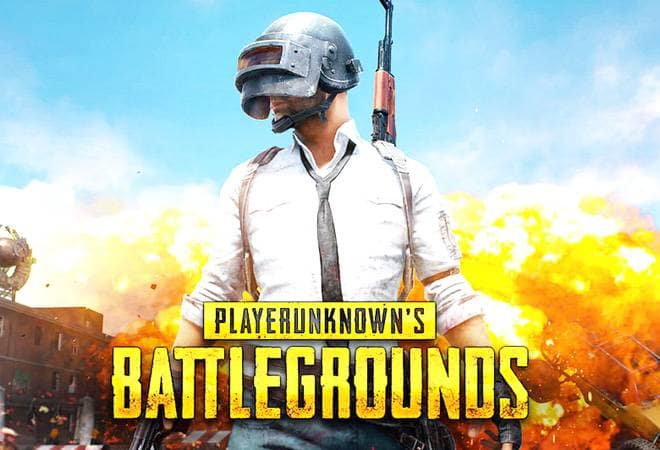

In [1]:
from IPython.display import Image
Image("pubg_image.jpg", width=600)

__Selected Dataset:__ PUBG Match Deaths and Statistics - First Person Player Team Battle Royale
<br>
__Link:__ https://www.kaggle.com/skihikingkevin/pubg-match-deaths
<br>
__Description:__ Over 1.7 million player records derived from PlayerUnknown Battleground's matches
<br>
<br>
__Background__
<br>
Video games are a rich area for data extraction due to its digital nature. Notable examples such as the complex EVE Online economy, World of Warcraft corrupted blood incident and even Grand Theft Auto self-driving cars tells us that fiction is closer to reality than we really think. Data scientists can gain insight on the logic and decision-making that the players face when put in hypothetical and virtual scenarios.

In this Kaggle Dataset, there are over 720,000 competitive matches from the popular game PlayerUnknown's Battlegrounds. The data was extracted from pubg.op.gg, a game tracker website.

## Questions that need answers

- What are the most important features that increase the chances of a player winning a match?
- What elements of the game should a player focus on in order to survive an entire round of killing and finish on top?
- How can we use the results of our findings to improve our gameplay strategy, ignore the distractions, and increase our winning percentage long term?

### Approach
<br>
To answer these questions and move up in the world of PUBG, we will need to analyze the available data, explore its contents and limitations, adhere it to our data science requirements, run several iterations of machine learning, and then interpret the results to answer our posed inquiries.

### The OSEMN Framework
I will be leveraging the OSEMN Framework to attack this project. OSEMN stands for Obtain, Scrub, Explore, Model, and iNterpret.
<br>
1. __Obtain__ - understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem
2. __Scrub__ - preprocessing our data, identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection
3. __Explore__ - getting to know the dataset you're working with, create visualizations, understanding the distribution of different columns, checking for multicollinearity, check the balance of the classes in the dataset
4. __Model__ - building and tuning models, defining a theshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results
5. __Interpret__ - interpret the results of your models, communicate results to stakeholders, determine if more invesitgation is needed or different data

# Obtaining the Data

__Import Libraries__

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

__Loading the Data__

In [3]:
df = pd.read_csv("squadfpp.csv")

In [4]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
2,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
3,5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
4,6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


In [5]:
df.columns = ['Unnamed: 0', 'Player_Id', 'Team_Id', 'Match_Id', 'Assists', 'Boosts',
       'Damage_Dealt', 'Knockdowns', 'Headshot_Kills', 'Heals', 'Killer_Placement',
       'Kill_Points', 'Kills', 'Kill_Streak', 'Longest_Kill', 'Match_Duration',
       'Match_Type', 'Max_Place', 'Num_Squads', 'Rank_Points', 'Revives',
       'Ride_Distance', 'Road_Kills', 'Swim_Distance', 'Friendly_Fire',
       'Vehicle_Destroys', 'Walk_Distance', 'Weapons_Acquired', 'Win_Points',
       'Win_Place_Percentage']

In [6]:
df.columns

Index(['Unnamed: 0', 'Player_Id', 'Team_Id', 'Match_Id', 'Assists', 'Boosts',
       'Damage_Dealt', 'Knockdowns', 'Headshot_Kills', 'Heals',
       'Killer_Placement', 'Kill_Points', 'Kills', 'Kill_Streak',
       'Longest_Kill', 'Match_Duration', 'Match_Type', 'Max_Place',
       'Num_Squads', 'Rank_Points', 'Revives', 'Ride_Distance', 'Road_Kills',
       'Swim_Distance', 'Friendly_Fire', 'Vehicle_Destroys', 'Walk_Distance',
       'Weapons_Acquired', 'Win_Points', 'Win_Place_Percentage'],
      dtype='object')

In [7]:
df.head()

,Unnamed: 0,Player_Id,Team_Id,Match_Id,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win_Place_Percentage
0,0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
1,1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
2,3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
3,5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
4,6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


### Understanding the Features
<br>
Data Dictionary for Team First Person Player PUBG Dataset

- __Player_Id:__ Unique Player ID
<br>
- __Team_Id:__ Unique Team ID
<br>
- __Match_Id:__ Unique Match ID
<br>
- __Assists:__ Total number of assists the player has utilized
<br>
- __Boosts:__ Total number of boosts the player has scored
<br>
- __Damage_Dealt:__ Total Hitpoint that the player has dealt to opponents
<br>
- __Knockdowns:__ Total number of knockdowns the player has scored - DBNO - "Down but not out"
<br>
- __Headshot_Kills:__ Total number of headshot kills the player has scored
<br>
- __Heals:__ Total number of heals the player has performed
<br>
- __Killer_Placement:__ Ranking of the player that killed you
<br>
- __Kill_Points:__ Total number of kills the player has scored
<br>
- __Kills:__ Total number of kills the player has scored
<br>
- __Kill_Streak:__ Total number of kills in a row, without dying, the player has scored in a game
<br>
- __Longest_Kill:__ The kill from the furthest distance from the victim
<br>
- __Match_Duration:__ The total amount of time of a single match (in seconds)
<br>
- __Match_Type:__ Whether the game was played in first-person (fpp) or third-person (tpp)
<br>
- __Max_Place:__ Player's highest placement at the end of a match
<br>
- __Num_Squads:__ Total number of squads participating in a game
<br>
- __Rank_Points:__ Player's total points from previous matches
<br>
- __Revives:__ Number of revives the player has performed
<br>
- __Ride_Distance:__ Total distance (in meters) that the player has travelled in a vehicle
<br>
- __Road_Kills:__ Player's total kills while in a vehicle
<br>
- __Swim_Distance:__ Total distance (in meters) that the player has swam in the water
<br>
- __Friendly_Fire:__ Total number of friendly-fire kills, when one player kills another player on his/her squad
<br>
- __Vehicle_Destroys:__ Total number of vehicles destroyed
<br>
- __Walk_Distance:__ Total distance (in meters) that the player has travelled on foot
<br>
- __Weapons_Acquired:__ Total number of weapons a player picks up
<br>
- __Win_Points:__ Total number of points earned from wins
<br>

## Target
- __Win/Loss:__ Binary 0 or 1 whether the player was on the winning team for the match or was eliminated
<br>

# Scrubbing the Data - Preprocessing

__Assessing Appropriate Data Types__

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1756186 entries, 0 to 1756185
Data columns (total 30 columns):
Unnamed: 0              int64
Player_Id               object
Team_Id                 object
Match_Id                object
Assists                 int64
Boosts                  int64
Damage_Dealt            float64
Knockdowns              int64
Headshot_Kills          int64
Heals                   int64
Killer_Placement        int64
Kill_Points             int64
Kills                   int64
Kill_Streak             int64
Longest_Kill            float64
Match_Duration          int64
Match_Type              object
Max_Place               int64
Num_Squads              int64
Rank_Points             int64
Revives                 int64
Ride_Distance           float64
Road_Kills              int64
Swim_Distance           float64
Friendly_Fire           int64
Vehicle_Destroys        int64
Walk_Distance           float64
Weapons_Acquired        int64
Win_Points              int64
Win

__Overview of the Data__
- 29 features
- 1,756,186 entries
- 4 categorical features
- 25 continuous features

There are no changes required to the data types for the numerical and categorical features.

In [9]:
df.describe()

,Unnamed: 0,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,Kill_Points,Kills,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win_Place_Percentage
count,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,...,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06,1.756186e+06
mean,2.223139e+06,2.872446e-01,1.107993e+00,1.335876e+02,8.728159e-01,2.206458e-01,1.476785e+00,4.792133e+01,5.566433e+02,9.083856e-01,...,2.197512e-01,5.816047e+02,1.967331e-03,4.219204e+00,2.691856e-02,7.765123e-03,1.232485e+03,3.626464e+00,6.417380e+02,4.647637e-01
std,1.283939e+06,6.399251e-01,1.666273e+00,1.657858e+02,1.278017e+00,5.644645e-01,2.749316e+00,2.749536e+01,6.594141e+02,1.487611e+00,...,5.395322e-01,1.455374e+03,5.011228e-02,2.818223e+01,1.819931e-01,9.126286e-02,1.242179e+03,2.283690e+00,7.461771e+02,3.115902e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.111205e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.672000e+02,2.000000e+00,0.000000e+00,1.852000e-01
50%,2.222630e+06,0.000000e+00,0.000000e+00,8.908000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.800000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.339000e+02,3.000000e+00,0.000000e+00,4.444000e-01
75%,3.335289e+06,0.000000e+00,2.000000e+00,1.913000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.200000e+01,1.257000e+03,1.000000e+00,...,0.000000e+00,3.600000e-03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.158000e+03,5.000000e+00,1.496000e+03,7.407000e-01
max,4.446964e+06,1.200000e+01,3.300000e+01,3.387000e+03,2.600000e+01,2.100000e+01,7.300000e+01,1.000000e+02,2.170000e+03,2.600000e+01,...,2.300000e+01,2.900000e+04,7.000000e+00,2.484000e+03,4.000000e+00,4.000000e+00,1.625000e+04,2.360000e+02,1.999000e+03,1.000000e+00


__Identifying Null Values__

In [10]:
df.isna().sum()

Unnamed: 0              0
Player_Id               0
Team_Id                 0
Match_Id                0
Assists                 0
Boosts                  0
Damage_Dealt            0
Knockdowns              0
Headshot_Kills          0
Heals                   0
Killer_Placement        0
Kill_Points             0
Kills                   0
Kill_Streak             0
Longest_Kill            0
Match_Duration          0
Match_Type              0
Max_Place               0
Num_Squads              0
Rank_Points             0
Revives                 0
Ride_Distance           0
Road_Kills              0
Swim_Distance           0
Friendly_Fire           0
Vehicle_Destroys        0
Walk_Distance           0
Weapons_Acquired        0
Win_Points              0
Win_Place_Percentage    0
dtype: int64

__Setting the Index__

In [11]:
df.set_index('Player_Id', inplace=True)
df.head()

,Unnamed: 0,Team_Id,Match_Id,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win_Place_Percentage
Player_Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,0,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0.4444
eef90569b9d03c,1,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400
4616d365dd2853,3,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.7,3,0,0.1667
ff79c12f326506,5,289a6836a88d27,bac52627a12114,0,0,100.00,1,1,0,44,...,0,0.0000,0,0.00,0,0,34.7,1,0,0.0370
95959be0e21ca3,6,2c485a1ad3d0f1,a8274e903927a2,0,0,0.00,0,0,0,96,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0.0000


__Initial Feature Engineering and Feature Selection__

<br>
Based on prior knowledge and understanding gameplay, we can assert that the 'Unnamed: 0', 'Match_Type', 'Match_Id', and 'Team_Id' features can be removed. Match type will be the same for all players - squad first person perspective. 'Match_Id' and 'Team_Id' are categorical features of no value to our classification goal. Our models will not benefit from these features. Additionally, we will need to create a new binary feature to capture winning and losing players. We can do this by using the Win Place Percentage feature.

In [12]:
# Dropping the 'Unnamed: 0 Column' from the df
df = df.drop(columns=['Unnamed: 0', 'Match_Type', 'Match_Id', 'Team_Id'])

__Finding and Addressing Negative Values__

Over 640,000 players have a -1 as a Rank Points score. We will need to address that value as Rank Points range from 0 to 2,000+. It will be the best strategy to replace all -1 values with the mean, 1,392.

In [13]:
df.Rank_Points = df.Rank_Points.replace(-1, 1392)

In [14]:
df.Rank_Points.value_counts().head()

1392    717860
1500     83418
0        31924
1480     24254
1490     13391
Name: Rank_Points, dtype: int64

__Create Target Variable from player_Win_Place_Percentage__

In [15]:
df['Win/Loss'] = np.where(df['Win_Place_Percentage'] < 1, 0, 1)
df = df.drop(columns='Win_Place_Percentage')
df.head()

,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,Kill_Points,Kills,Kill_Streak,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win/Loss
Player_Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0
eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0
4616d365dd2853,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.7,3,0,0
ff79c12f326506,0,0,100.00,1,1,0,44,0,1,1,...,0,0.0000,0,0.00,0,0,34.7,1,0,0
95959be0e21ca3,0,0,0.00,0,0,0,96,1262,0,0,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0


__Checking for Multicollinearity__

In [16]:
feat = df.drop(columns=['Win/Loss'])

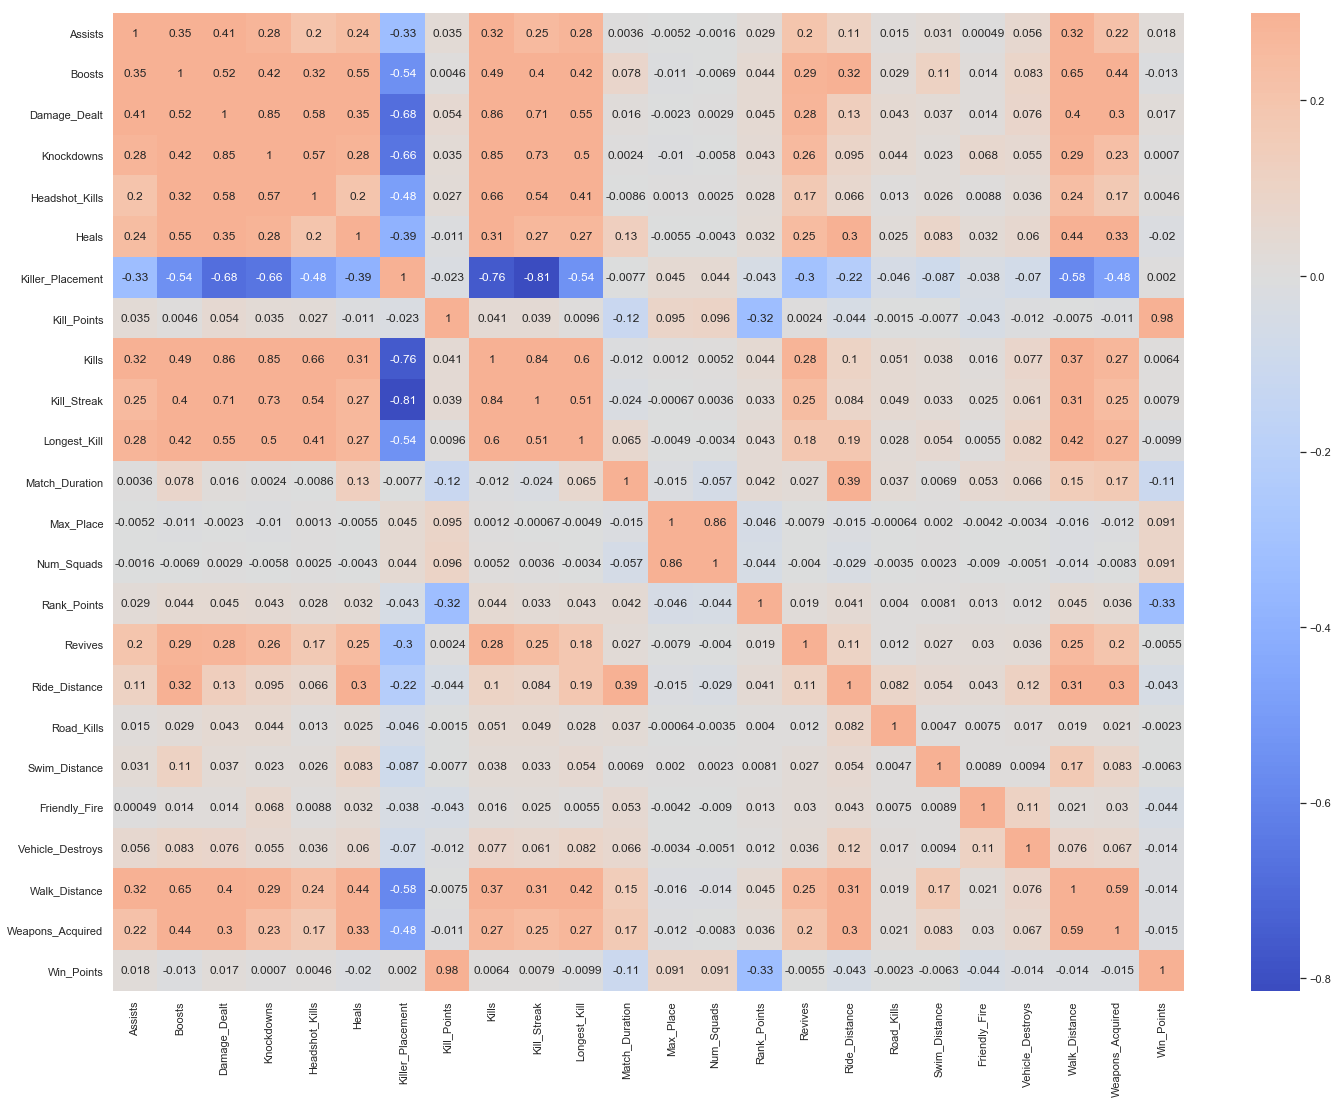

In [17]:
sns.set(style="white")
corr = feat.corr()
f, ax = plt.subplots(figsize=(24, 18))
sns.heatmap(corr, cmap="coolwarm", vmax=.3, center=0, annot=True)

__Candidates for Feature Removal__
- __player_Rank_Points__: this feature displays a negative relationship with player_Kill_Points and player_Win_Points
- __player_Kill_Streak__: this feature displays a negative relationship with player_Kills and a positive relationship with other features
- __player_Longest_Kill__: this feature displays a negative relationship with player_Kills and a positive relationship with other features
- __killer_Placement__: this feature displays a negative relationship with several features
- __player_Weapons_Acquired__: this feature displays a positive relationship with several features
- __player_Walk_Distance__: this feature displays a positive relationship with several features
- __player_Kill_Points__: this feature displays a positive relationship with player_Win_Points and player_Rank_Points
- __player_Max_Place__: this feature displays a positive relationship with num_Teams
- __player_Damage_Dealt__: this feature displays a positive relationship with player_Kills
- __player_Knockdowns__: this feature displays a positive relationship with player_Kills
- __player_Headshot_Kills__: this feature displays a positive relationship with player_Kills

### Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115de6320>,
      dtype=object)

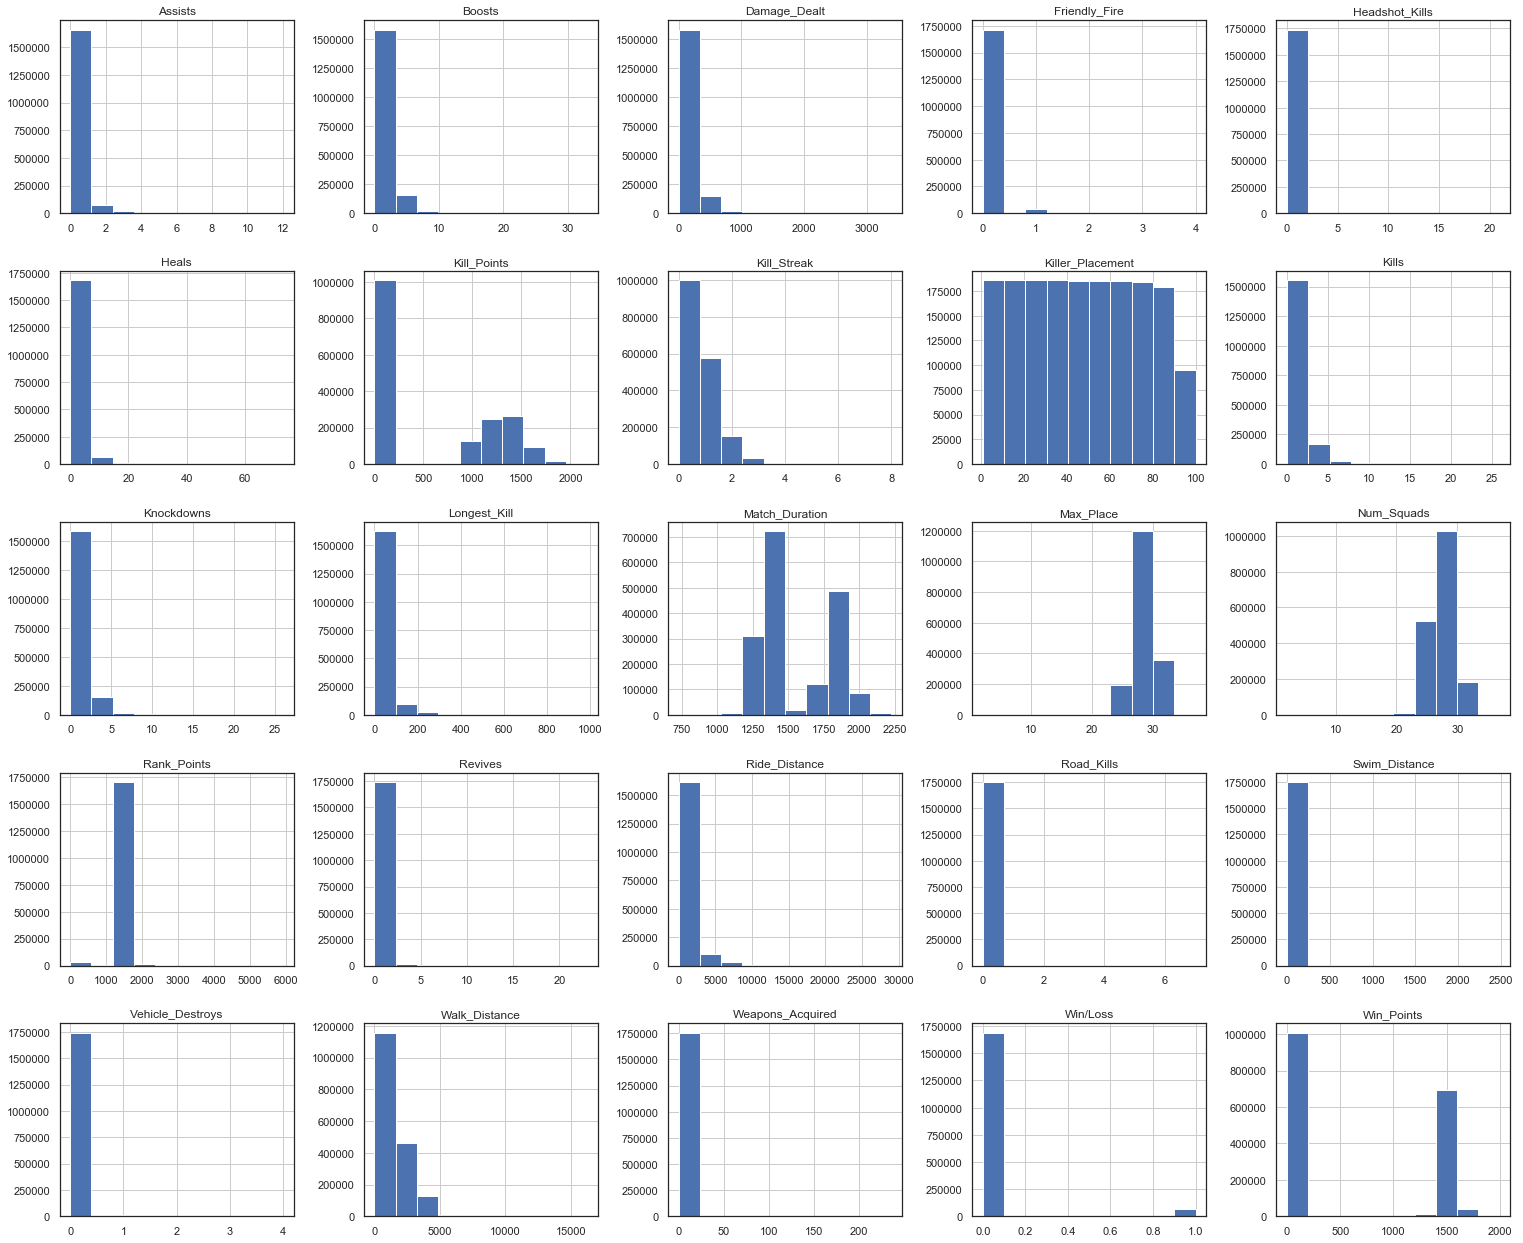

In [18]:
df.hist(figsize=(26,22))

__Distribution Analysis__
<br>
There are many outliers present in these distributions which is causing a significant right skew for many of the features. To reduce this, we must remove the outliers.

__Removing Outliers__

In [19]:
df_new = df.copy(deep=True)
df_new.head()

,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,Kill_Points,Kills,Kill_Streak,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win/Loss
Player_Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,0,0,0.00,0,0,0,60,1241,0,0,...,0,0.0000,0,0.00,0,0,244.8,1,1466,0
eef90569b9d03c,0,0,91.47,0,0,0,57,0,0,0,...,0,0.0045,0,11.04,0,0,1434.0,5,0,0
4616d365dd2853,0,0,32.90,0,0,0,75,0,0,0,...,0,0.0000,0,0.00,0,0,202.7,3,0,0
ff79c12f326506,0,0,100.00,1,1,0,44,0,1,1,...,0,0.0000,0,0.00,0,0,34.7,1,0,0
95959be0e21ca3,0,0,0.00,0,0,0,96,1262,0,0,...,0,0.0000,0,0.00,0,0,13.5,1,1497,0


In [214]:
df_new.describe()

,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,Kill_Points,Kills,Kill_Streak,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win/Loss
count,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,...,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06,1553887.0,1.553887e+06,1.553887e+06,1.553887e+06,1.553887e+06
mean,2.470244e-01,8.583900e-01,1.175467e+02,7.690521e-01,1.858366e-01,1.110626e+00,5.064080e+01,5.614862e+02,7.692207e-01,5.071945e-01,...,1.921066e-01,2.798989e+02,8.745810e-04,4.852492e-01,1.908633e-02,0.0,1.063231e+03,3.405836e+00,6.486434e+02,2.567626e-02
std,5.706289e-01,1.358816e+00,1.394779e+02,1.102188e+00,4.843044e-01,2.059985e+00,2.712206e+01,6.579956e+02,1.236606e+00,6.940268e-01,...,4.963055e-01,7.522626e+02,2.956039e-02,3.361655e+00,1.368286e-01,0.0,1.142304e+03,2.174861e+00,7.461568e+02,1.581676e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.405000e+02,2.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,8.020000e+01,0.000000e+00,0.000000e+00,0.000000e+00,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,5.167000e+02,3.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.000000e+00,1.733000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.400000e+01,1.258000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.844000e+03,5.000000e+00,1.496000e+03,0.000000e+00
max,4.000000e+00,6.000000e+00,1.199000e+03,7.000000e+00,4.000000e+00,1.200000e+01,1.000000e+02,2.170000e+03,8.000000e+00,3.000000e+00,...,4.000000e+00,3.999000e+03,1.000000e+00,3.999000e+01,1.000000e+00,0.0,4.999000e+03,1.400000e+01,1.999000e+03,1.000000e+00


In [20]:
df_new = df_new[df_new.Assists < 5]

In [21]:
df_new = df_new[df_new.Boosts < 7]

In [22]:
df_new = df_new[df_new.Damage_Dealt < 1200]

In [23]:
df_new = df_new[df_new.Headshot_Kills < 5]

In [24]:
df_new = df_new[df_new.Knockdowns < 8]

In [25]:
df_new = df_new[df_new.Longest_Kill < 250]

In [26]:
df_new = df_new[df_new.Rank_Points < 3000]

In [27]:
df_new = df_new[df_new.Revives < 5]

In [28]:
df_new = df_new[df_new.Ride_Distance < 4000]

In [29]:
df_new = df_new[df_new.Kills < 9]

In [30]:
df_new = df_new[df_new.Heals < 13]

In [31]:
df_new = df_new[df_new.Road_Kills < 2]

In [32]:
df_new = df_new[df_new.Swim_Distance < 40]

In [33]:
df_new = df_new[df_new.Kill_Streak < 4]

In [34]:
df_new = df_new[df_new.Walk_Distance < 5000]

In [35]:
df_new = df_new[df_new.Weapons_Acquired < 15]

In [36]:
df_new = df_new[df_new.Vehicle_Destroys < 1]

In [37]:
df_new = df_new[df_new.Friendly_Fire < 2]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a18d078d0>,
      dtype=object)

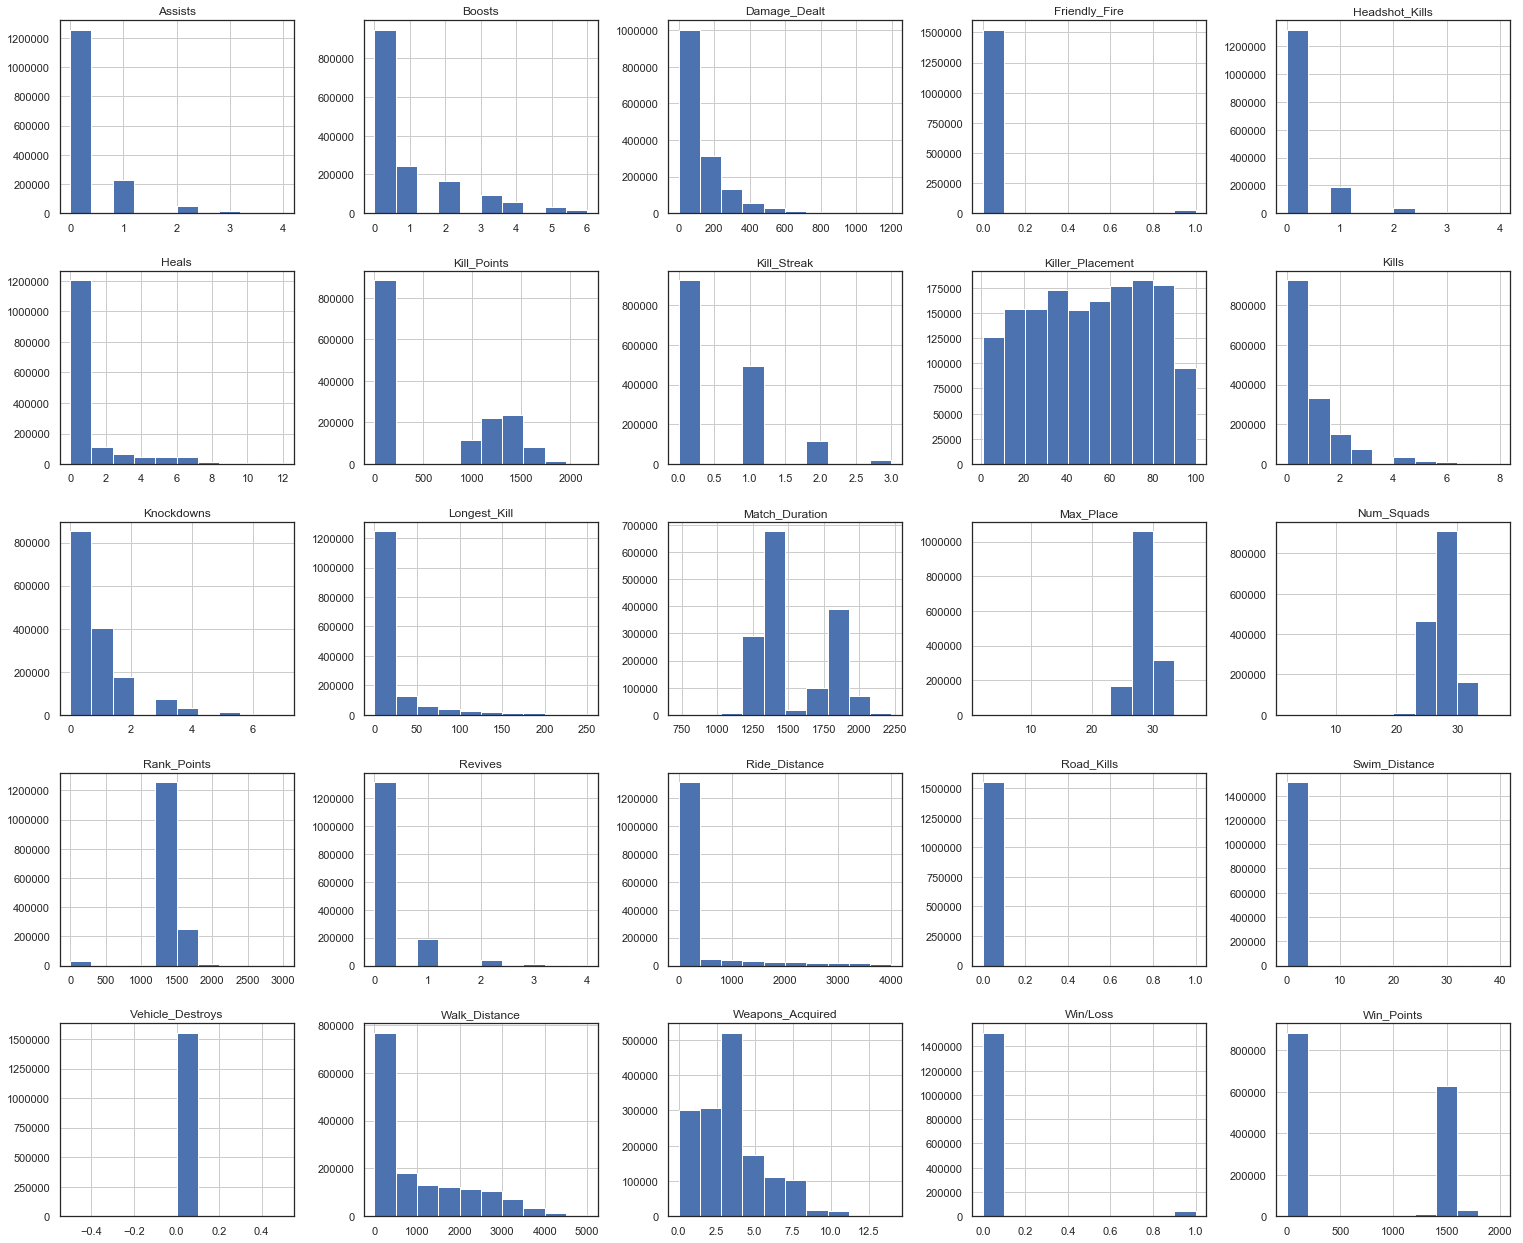

In [38]:
df_new.hist(figsize=(26,22))

__Normal Distribution Analysis Post-Outlier Removal__
<br>
Removing many outliers from the above features did reduce the skewedness of some distributions, however, none of the features emulate a normal distribution. We will have to implement data transformations on the chosen features to create normality to improve the overall accuracy of our classification models.

__Data Transformation - Standard Scale__

In [39]:
df_numerical = df_new.drop(columns='Win/Loss')

In [40]:
numerical_columns = df_numerical.columns

In [41]:
from sklearn.preprocessing import StandardScaler

df_scaled = df_numerical.copy(deep=True)

In [42]:
sc = StandardScaler()
df_scaled[numerical_columns] = sc.fit_transform(df_scaled[numerical_columns])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a0cf748>,
      dtype=object)

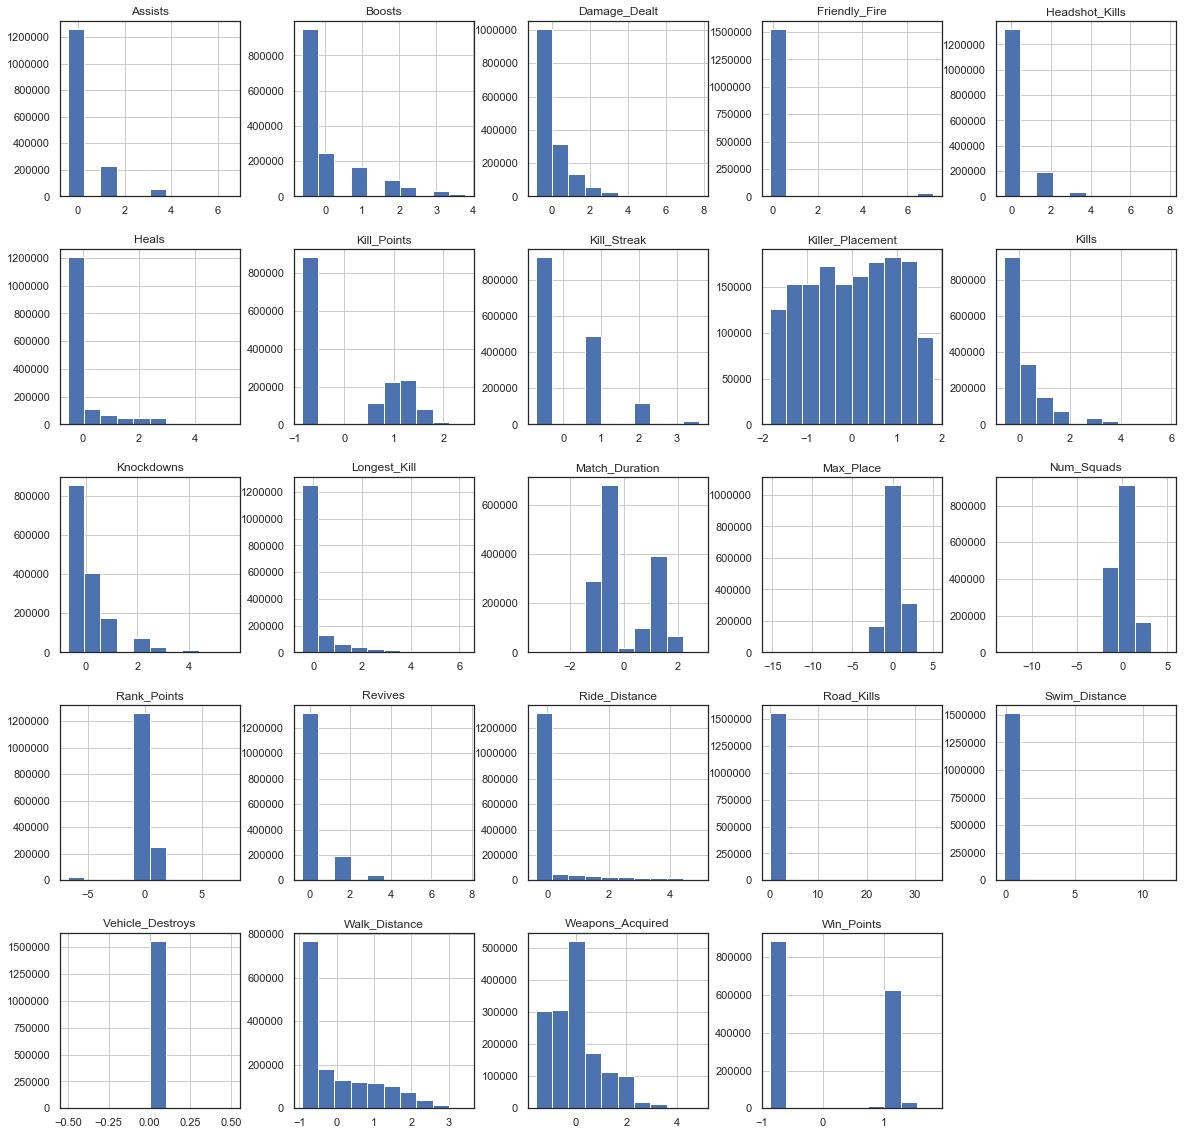

In [43]:
df_scaled[numerical_columns].hist(figsize=(20,20))

In [44]:
df_scaled[numerical_columns].head()

,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,Kill_Points,Kills,Kill_Streak,...,Rank_Points,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points
Player_Id,,,,,,,,,,,,,,,,,,,,,
7f96b2f878858a,-0.432899,-0.631719,-0.842763,-0.697751,-0.383719,-0.539143,0.345077,1.032703,-0.622042,-0.730800,...,-0.082504,-0.387073,-0.372076,-0.029586,-0.144348,-0.139491,0.0,-0.716474,-1.106202,1.095422
eef90569b9d03c,-0.432899,-0.631719,-0.186959,-0.697751,-0.383719,-0.539143,0.234466,-0.853329,-0.622042,-0.730800,...,0.358572,-0.387073,-0.372070,-0.029586,3.139749,-0.139491,0.0,0.324580,0.732996,-0.869313
4616d365dd2853,-0.432899,-0.631719,-0.606883,-0.697751,-0.383719,-0.539143,0.898133,-0.853329,-0.622042,-0.730800,...,-0.005795,-0.387073,-0.372076,-0.029586,-0.144348,-0.139491,0.0,-0.753329,-0.186603,-0.869313
ff79c12f326506,-0.432899,-0.631719,-0.125803,0.209536,1.681099,-0.539143,-0.244849,-0.853329,0.186623,0.710067,...,0.042148,-0.387073,-0.372076,-0.029586,-0.144348,-0.139491,0.0,-0.900400,-1.106202,-0.869313
95959be0e21ca3,-0.432899,-0.631719,-0.842763,-0.697751,-0.383719,-0.539143,1.672411,1.064618,-0.622042,-0.730800,...,-0.082504,-0.387073,-0.372076,-0.029586,-0.144348,-0.139491,0.0,-0.918959,-1.106202,1.136969


# Exploring the Data

In [45]:
df_new.columns

Index(['Assists', 'Boosts', 'Damage_Dealt', 'Knockdowns', 'Headshot_Kills',
       'Heals', 'Killer_Placement', 'Kill_Points', 'Kills', 'Kill_Streak',
       'Longest_Kill', 'Match_Duration', 'Max_Place', 'Num_Squads',
       'Rank_Points', 'Revives', 'Ride_Distance', 'Road_Kills',
       'Swim_Distance', 'Friendly_Fire', 'Vehicle_Destroys', 'Walk_Distance',
       'Weapons_Acquired', 'Win_Points', 'Win/Loss'],
      dtype='object')

### Understanding the Features

__Assists__ - (Range 0 - 4 Assists)
<br>
In both solo and squad mode, players record assists when they significantly deal damage to an opposing player, but then another player (teammate or otherwise) finishes off the player by killing them. Before this statistic was recorded, players would often gripe with one another about who deserved kills when two players are both firing on the same opponent. This is an important statistic in terms of measuring the skill and aggression of a player, as players with more assists are more active in pursuing and shooting at opponents. This aggression also increases their chances of being killed, but in my experience, the better players choose an aggressive strategy and use their superior fighting skills to outlast opponents rather than hide and wait for all others to eliminate the competition. As the data below describes, the average player records no assists in a match. It is a difficult game in which the best players succeed and tend to survive longer into a match, while the majority of players do not get the chance to record a kill or an assist.

In [46]:
df_new.Assists.value_counts()

0    1256759
1     229093
2      52417
3      12551
4       3067
Name: Assists, dtype: int64

In [192]:
df_new.Assists.describe()

count    1.553887e+06
mean     2.470244e-01
std      5.706289e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+00
Name: Assists, dtype: float64

__Boosts__ - (Range: 0 - 6 Boosts)
<br>
Boosts are derived from certain items that can be picked around the map and include Energy Drinks, Painkillers, and Adrenaline Syringes. Boosts restore health and temporarily increase the movement speed of a player. Each item delivers a different potency of health and speed when consumed. Adrenaline syringes are the most sought after items while energy drinks are more commonplace and less powerful. Players that utilize boosts are often the more aggressive players getting in frequent firefights and needing health regeneration after being shot. It is not a direct correlation, however players that survive longer in a match are more likely to come across opponents (as the map decreases in area), therefore more likely to be fired upon and hit, therefore more likely to need boosts.

In [47]:
df_new.Boosts.value_counts()

0    946908
1    244817
2    165594
3     92545
4     56201
5     31535
6     16287
Name: Boosts, dtype: int64

In [193]:
df_new.Boosts.describe()

count    1.553887e+06
mean     8.583900e-01
std      1.358816e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      6.000000e+00
Name: Boosts, dtype: float64

__Damage Dealt__ - (Range: 0 - 1199 HP)
<br>
Damage dealt captures the level of damage that a player inflicts on a single opponent during a match. Each player has 100HP, however, boosts can be used by players to recover. So it is possible for a single player to inflict more than 100 damage onto a player over the course of a match. We see a range from 0-1,119 damage dealt. This may not be the most useful feature in classifying wins/losses.

In [48]:
df_new.Damage_Dealt.value_counts(sort=True).head()

0.0      426910
100.0     88775
200.0     19769
75.0       5374
300.0      4276
Name: Damage_Dealt, dtype: int64

In [194]:
df_new.Damage_Dealt.describe()

count    1.553887e+06
mean     1.175467e+02
std      1.394779e+02
min      0.000000e+00
25%      0.000000e+00
50%      8.020000e+01
75%      1.733000e+02
max      1.199000e+03
Name: Damage_Dealt, dtype: float64

__Knockdowns__ - (Range: 0 - 7 DBNO)
<br>
Also called DBNO, 'Down But No Out'. During Duo or Squad play, when you are shot or injured to the point that you lose all your HP, you go into DBNO mode. During this brief period of time, your teammates can heal you and bring you back to normal gameplay. You can also be officially killed by opponents while in this mode and crawling around. If you have good teammates, they will help you out in this tough scenario. 
<br>
<br>
While in DBNO state:
<br>
- A player is not able to fire weapons or use items
- A player can only crawl and drop items
- A player's revive time will gradually decrease
- When revive time reaches zero, the character will die and cannot be revived for the rest of the match

In [49]:
df_new.Knockdowns.value_counts(sort=True).head()

0    853328
1    403141
2    176654
3     72251
4     29284
Name: Knockdowns, dtype: int64

In [195]:
df_new.Knockdowns.describe()

count    1.553887e+06
mean     7.690521e-01
std      1.102188e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      7.000000e+00
Name: Knockdowns, dtype: float64

__Headshot Kills__ - (Range: 0 - 4 Headshots)
<br>
Headshot kills demonstrate significant skill and accuracy in one's shooting abilities. These kills occur when the final kill strike hits an opponent in the head. Headshot skills reward players with higher kill points than a normal kill.

In [50]:
df_new.Headshot_Kills.value_counts(sort=True).head()

0    1318767
1     191166
2      35595
3       7023
4       1336
Name: Headshot_Kills, dtype: int64

In [196]:
df_new.Headshot_Kills.describe()

count    1.553887e+06
mean     1.858366e-01
std      4.843044e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+00
Name: Headshot_Kills, dtype: float64

__Heals__ - (Range: 0 - 12 Heals)
<br>
Health doesn’t automatically regenerate in PUBG, but thankfully there are quite a few ways to bring top up your health bar if things do get a little hairy. Items range all the way from rolls of Bandages and stacks of Energy Drinks that’ll heal you a little, to bulky Med Kits that are very hard to come by but will completely restore all your HP in one use. Players can heal themselves and assist their teammates with supplies to restore health during a match. It is more likely for players that last longer in a match are more likely to be shot and injured requiring healing supplies to survive. It is an indirect statistic that may be helpful in classifying wins and losses.

In [51]:
df_new.Heals.value_counts(sort=True).head()

0    959939
1    243832
2    108977
3     65532
4     45253
Name: Heals, dtype: int64

In [197]:
df_new.Heals.describe()

count    1.553887e+06
mean     1.110626e+00
std      2.059985e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.200000e+01
Name: Heals, dtype: float64

__Kill Points__ - (Range: 0 - 2170 Kill Points)
<br>
Kill points are earned for each kill during a round. Players are awarded points per kill and the value increases for each kill on an extended kill streak. These points accumulate and are added to the player's win points for a total score. Kill points are a representation of the overall accomplishments of a player from a particular match round. It is a key indicator of whether a player won or lost a match.

In [52]:
df_new.Kill_Points.value_counts(sort=True).head()

0       884206
1000     37136
1354      1465
1346      1451
1300      1439
Name: Kill_Points, dtype: int64

In [198]:
df_new.Kill_Points.describe()

count    1.553887e+06
mean     5.614862e+02
std      6.579956e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.258000e+03
max      2.170000e+03
Name: Kill_Points, dtype: float64

__Kills__ - (Range: 0 - 8 Kills)
<br>
Kills are tallied when a player reduces an opponent's health to 0 HP (health points) with any weapon or vehicle of choice. Kills require significant skill in this game and often the best players rack of the most kills as well as points in a given match. It is an important measure of a player's abilities and increases their likelihood of winning a game.

In [53]:
df_new.Kills.value_counts(sort=True).head()

0    924544
1    332070
2    153500
3     75283
4     35769
Name: Kills, dtype: int64

In [199]:
df_new.Kills.describe()

count    1.553887e+06
mean     7.692207e-01
std      1.236606e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      8.000000e+00
Name: Kills, dtype: float64

__Kill Streak__ - (Range: 0 - 3 Kills in a row)
<br>
Kills streaks occur when a player accumulates multiple kills in a single round. For each kill in a kill streak, a player receives larger kill point values increasing their overall score for the match. High kill streaks are earned by the top players in a match who survive to the final parts of a round.

In [54]:
df_new.Kill_Streak.value_counts(sort=True).head()

0    924544
1    491820
2    116266
3     21257
Name: Kill_Streak, dtype: int64

In [200]:
df_new.Kill_Streak.describe()

count    1.553887e+06
mean     5.071945e-01
std      6.940268e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      3.000000e+00
Name: Kill_Streak, dtype: float64

__Longest Kill__ - (Range: 0 - 249.9 Meters)
<br>
The longest kill feature measures the distance one player is from an opposing player that he/she kills. It is more difficult to kill an opponent from a further distance, so a high kill distance is an impressive feat. The longest kill in PUBG so far was 6,766 meters away, from Stalber in the Northeast corner of the map, to Primorsk in the Southwest bottom corner of the map. Most kills occur within 20 meters or so.

In [55]:
df_new.Longest_Kill.value_counts(sort=True).head()

0.00     926698
10.56       181
10.15       180
10.10       176
10.19       175
Name: Longest_Kill, dtype: int64

In [201]:
df_new.Longest_Kill.describe()

count    1.553887e+06
mean     1.736684e+01
std      3.724829e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.625000e+01
max      2.499000e+02
Name: Longest_Kill, dtype: float64

__Match Duration__ - (Range: 0 - 2226 Seconds)
<br>
Most matches are between 20 and 40 minutes in duration depending on how quickly players are killed. Matches last until there is only a single player or team standing. This may or may not be an important feature to help classify wins/losses.

In [56]:
df_new.Match_Duration.value_counts(sort=True).head()

1375    11391
1380    10895
1373    10559
1376    10461
1387    10017
Name: Match_Duration, dtype: int64

In [202]:
df_new.Match_Duration.describe()

count    1.553887e+06
mean     1.533764e+03
std      2.468575e+02
min      7.280000e+02
25%      1.347000e+03
50%      1.393000e+03
75%      1.807000e+03
max      2.226000e+03
Name: Match_Duration, dtype: float64

__Max Place__ - (Range: 2nd - 37th Place)
<br>
Max place indicates the highest finish a player has had in a squad match. It is indicative of their past performance and may be useful in classifying wins and losses.

In [57]:
df_new.Max_Place.value_counts(sort=True).head()

28    410246
29    355739
27    294847
30    198366
26    122737
Name: Max_Place, dtype: int64

In [58]:
df_new.Max_Place.value_counts(sort=True).tail()

7    20
4    19
9    16
8    15
2    11
Name: Max_Place, dtype: int64

In [203]:
df_new.Max_Place.describe()

count    1.553887e+06
mean     2.826996e+01
std      1.716295e+00
min      2.000000e+00
25%      2.700000e+01
50%      2.800000e+01
75%      2.900000e+01
max      3.700000e+01
Name: Max_Place, dtype: float64

__Number of Squads__ - (Range: 0 - 37 Squads)
<br>
This feature captures the number of squads competing in a round, consisting of 100 players. Some matches have fewer players so the number of team can vary from 2 to 37. Most games have around 25 teams competing to win.

In [59]:
df_new.Num_Squads.value_counts(sort=True).head()

27    348527
28    334026
26    253027
29    227501
25    136792
Name: Num_Squads, dtype: int64

In [204]:
df_new.Num_Squads.describe()

count    1.553887e+06
mean     2.733449e+01
std      1.931183e+00
min      2.000000e+00
25%      2.600000e+01
50%      2.700000e+01
75%      2.900000e+01
max      3.700000e+01
Name: Num_Squads, dtype: float64

__Rank Points__ - (Range: 0 - 2999 Points)
<br>
There are 8 different tiers for Ranks in PUBG, which progress as such: 
<br>
- Unranked: Less than 10 matches played, 0 Rank Points
- Bronze: Less 1400 Rank Points
- Silver: 1400-1499 Rank Points
- Gold: 1500-1599 Rank Points
- Platinum: 1600-1699 Rank Points
- Diamond: 1700-1799 Rank Points
- Elite: 1800-1899 Rank Points
- Master: 1900-1999 Rank Points
- Grand Master: 2000+ Rank Points

In [60]:
df_new.Rank_Points.value_counts(sort=True).head()

1392    642832
1500     73422
0        28737
1480     21607
1490     11696
Name: Rank_Points, dtype: int64

In [61]:
df_new.Rank_Points.describe()

count    1.553887e+06
mean     1.409209e+03
std      2.085809e+02
min      0.000000e+00
25%      1.392000e+03
50%      1.392000e+03
75%      1.482000e+03
max      2.999000e+03
Name: Rank_Points, dtype: float64

__Revives__ - (Range: 0 - 4 Revives)
<br>
Players are able to revive squad team members that have been knocked down (DBNO). When a teammate is in DBNO state, players can revive them by nearing them and interacting with the character. This will return the teammate back to normal state at a low HP level. But they are free to use their weapons and access their items once brought back. If all other teammates are killed, then a player dies immediately without DBNO mode.

In [62]:
df_new.Revives.value_counts(sort=True).head()

0    1314983
1     189243
2      40952
3       7471
4       1238
Name: Revives, dtype: int64

In [205]:
df_new.Revives.describe()

count    1.553887e+06
mean     1.921066e-01
std      4.963055e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.000000e+00
Name: Revives, dtype: float64

__Ride Distance__ - (Range: 0 - 3999 Meters)
<br>
Vehicles are a part of normal gameplay and can be found around the battleground. Players are able to enter vehicles and can travel longer distances faster than on foot. It is not easy to discover vacant vehicles so most players do not have the opportunity to ride in one. But they are helpful when time is of the essence and the battleground is shrinking around a player.

In [63]:
df_new.Ride_Distance.value_counts(sort=True).head()

0.0       1257085
1008.0        120
1061.0        118
1016.0        118
1080.0        117
Name: Ride_Distance, dtype: int64

In [206]:
df_new.Ride_Distance.describe()

count    1.553887e+06
mean     2.798989e+02
std      7.522626e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.999000e+03
Name: Ride_Distance, dtype: float64

__Road Kills__ - (Range: 0 - 1 Kills in a vehicle)
<br>
This particular statistic is an even rarer occurence in traditional Battleground gameplay. Most players are not operating vehicles during the course of a match, so kills while driving a vehicle are not commonplace. That is why 99% of the data for this feature are zeros. This is a valid reason to remove this feature before we move forward.

In [64]:
df_new.Road_Kills.value_counts(sort=True).head()

0    1552528
1       1359
Name: Road_Kills, dtype: int64

In [207]:
df_new.Road_Kills.describe()

count    1.553887e+06
mean     8.745810e-04
std      2.956039e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Road_Kills, dtype: float64

__Swim Distance__ - (Range: 0 - 3999 Meters)
<br>
Players do come across water features on the maps in Battleground and are able to swim. The distance is captured in this feature, however most maps consist mostly of land so swimming is not a major part of gameplay. It also leaves players vulnerable to attack without the ability to fire back while swimming. For these reasons, most players do not have a positive swim distance.

In [65]:
df_new.Swim_Distance.value_counts(sort=True).head()

0.00     1504565
10.84         27
10.14         24
18.70         24
19.75         24
Name: Swim_Distance, dtype: int64

In [208]:
df_new.Swim_Distance.describe()

count    1.553887e+06
mean     4.852492e-01
std      3.361655e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.999000e+01
Name: Swim_Distance, dtype: float64

__Friendly Fire__ - (Range: 0 - 1 FF Kills)
<br>
Friendly-fire kills occur when one player kills another teammate in their squad during a match. This is frowned upon and can lead to animosity within a squad. Players would want to avoid team kills to maximize their chances of winning a match. The majority of matches have few or no team kills as most players intentionally avoid shooting their squad. 

In [66]:
df_new.Friendly_Fire.value_counts(sort=True).head()

0    1524229
1      29658
Name: Friendly_Fire, dtype: int64

In [209]:
df_new.Friendly_Fire.describe()

count    1.553887e+06
mean     1.908633e-02
std      1.368286e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: Friendly_Fire, dtype: float64

__Vehicles Destroyed__ - (Range: 0, No vehicles destroyed)
<br>
This particular statistic is a rare occurence in traditional Battleground gameplay. Most players are focused on killing other players on foot and remaining alive and it is far more difficult to destroy a vehicle than an opponent. That is why 99% of the data for this feature are zeros. This is a valid reason to remove this feature before we move forward.

In [67]:
df_new.Vehicle_Destroys.value_counts(sort=True).head()

0    1553887
Name: Vehicle_Destroys, dtype: int64

In [210]:
df_new.Vehicle_Destroys.describe()

count    1553887.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Vehicle_Destroys, dtype: float64

__Walk Distance__ - (Range: 0 - 4999 Meters)
<br>
Walking distance tracks the total distance traveled by a player on foot throughout a match. This is a very important feature as it indicates how long a player survived during a match. Naturally, the players with the best chance of winning need to travel significant distances in order to remain within the shrinking battleground. The battleground decreases in size as the match proceeds forcing players into a smaller and smaller area. Those players outside the circle lose health points at a rapid rate until they are killed.

In [68]:
df_new.Walk_Distance.value_counts(sort=True).head()

0.00       30041
0.28         426
1007.00      321
1365.00      321
1117.00      317
Name: Walk_Distance, dtype: int64

In [211]:
df_new.Walk_Distance.describe()

count    1.553887e+06
mean     1.063231e+03
std      1.142304e+03
min      0.000000e+00
25%      1.405000e+02
50%      5.167000e+02
75%      1.844000e+03
max      4.999000e+03
Name: Walk_Distance, dtype: float64

__Weapons Acquired__ - (Range: 0 - 14 Weapons)
<br>
Players can pick up weapons on the ground throughout the maps during a match. There are over 25 available guns hidden throughout any area and players search to acquire the most powerful weapons to increase their ability to deal damage to their opponents. Players are able to carry multiple weapons at the same time. Weapons acquired could be an important feature.

In [69]:
df_new.Weapons_Acquired.value_counts(sort=True).head()

2    305820
3    283894
4    236701
1    224635
5    173833
Name: Weapons_Acquired, dtype: int64

In [212]:
df_new.Weapons_Acquired.describe()

count    1.553887e+06
mean     3.405836e+00
std      2.174861e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      1.400000e+01
Name: Weapons_Acquired, dtype: float64

__Win Points__ - (Range: 0 - 1999 Points)
<br>
Win points are earned by players who have won a particular match. They are added to a player's kill points for a total score for a round. Win points are an important feature to classify wins and losses.

In [70]:
df_new.Win_Points.value_counts(sort=True).head()

0       884206
1500     43318
1501      7073
1498      6847
1503      6838
Name: Win_Points, dtype: int64

In [213]:
df_new.Win_Points.describe()

count    1.553887e+06
mean     6.486434e+02
std      7.461568e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.496000e+03
max      1.999000e+03
Name: Win_Points, dtype: float64

__Target: Win/Loss__
<br>
Our goal is to classify wins and losses based on a chosen set of the above features and using three separate classification models:
- Logistic Regression
- Random Forest
- XGBoost

In [225]:
df_new[df_new['Win/Loss'] == 1.0].Longest_Kill()

,Assists,Boosts,Damage_Dealt,Knockdowns,Headshot_Kills,Heals,Killer_Placement,Kill_Points,Kills,Kill_Streak,...,Revives,Ride_Distance,Road_Kills,Swim_Distance,Friendly_Fire,Vehicle_Destroys,Walk_Distance,Weapons_Acquired,Win_Points,Win/Loss
count,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,...,39898.000000,39898.000000,39898.000000,39898.000000,39898.000000,39898.0,39898.000000,39898.000000,39898.000000,39898.0
mean,1.014763,2.941802,296.095104,1.701514,0.605720,2.640809,16.126147,621.730538,2.487443,1.150333,...,0.488646,537.955083,0.001379,1.241950,0.008697,0.0,2983.211412,5.235175,677.157727,1.0
std,1.057704,1.750775,214.745681,1.580583,0.850162,2.606603,14.312676,717.539400,2.040865,0.763616,...,0.753489,998.503238,0.037103,5.319567,0.092853,0.0,926.731980,2.057684,767.383088,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0
25%,0.000000,2.000000,126.925000,0.000000,0.000000,1.000000,4.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2593.250000,4.000000,0.000000,1.0
50%,1.000000,3.000000,259.500000,1.000000,0.000000,2.000000,11.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,3091.000000,5.000000,0.000000,1.0
75%,2.000000,4.000000,429.000000,3.000000,1.000000,4.000000,23.000000,1383.000000,4.000000,2.000000,...,1.000000,620.650000,0.000000,0.000000,0.000000,0.0,3545.000000,6.000000,1517.000000,1.0
max,4.000000,6.000000,1197.000000,7.000000,4.000000,12.000000,57.000000,2087.000000,8.000000,3.000000,...,4.000000,3999.000000,1.000000,39.970000,1.000000,0.0,4999.000000,14.000000,1999.000000,1.0


In [294]:
winning_players = df[df['Win/Loss'] == 1.0]
losing_players = df[df['Win/Loss'] != 1.0]

In [235]:
winning_players.columns

Index(['Assists', 'Boosts', 'Damage_Dealt', 'Knockdowns', 'Headshot_Kills',
       'Heals', 'Killer_Placement', 'Kill_Points', 'Kills', 'Kill_Streak',
       'Longest_Kill', 'Match_Duration', 'Max_Place', 'Num_Squads',
       'Rank_Points', 'Revives', 'Ride_Distance', 'Road_Kills',
       'Swim_Distance', 'Friendly_Fire', 'Vehicle_Destroys', 'Walk_Distance',
       'Weapons_Acquired', 'Win_Points', 'Win/Loss'],
      dtype='object')

In [295]:
winning_players_1 = winning_players.drop(columns= ['Damage_Dealt', 'Knockdowns', 'Kill_Points', 'Kill_Streak',
                                                   'Match_Duration', 
                                         'Max_Place', 'Num_Squads', 'Rank_Points', 'Revives', 'Ride_Distance', 
                                         'Road_Kills', 'Swim_Distance', 'Friendly_Fire', 'Vehicle_Destroys', 
                                                   'Win_Points', 'Win/Loss'])

In [296]:
losing_players_1 = losing_players.drop(columns= ['Damage_Dealt', 'Knockdowns', 'Kill_Points', 'Kill_Streak','Match_Duration', 
                                         'Max_Place', 'Num_Squads', 'Rank_Points', 'Revives', 'Ride_Distance', 
                                         'Road_Kills', 'Swim_Distance', 'Friendly_Fire', 'Vehicle_Destroys', 
                                                 'Win_Points', 'Win/Loss'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2e57ef28>,
      dtype=object)

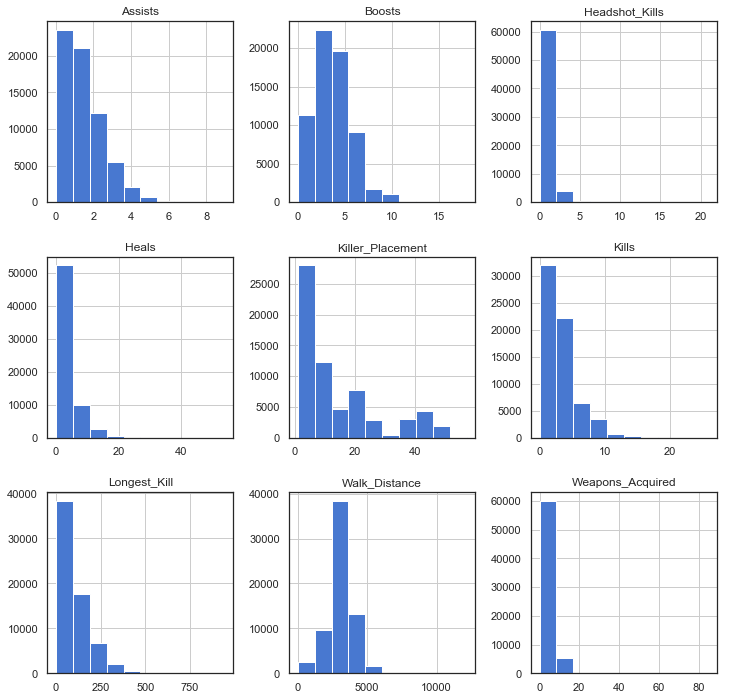

In [297]:
winning_players_1.hist(figsize=(12,12))

In [298]:
winning_players_1.columns

Index(['Assists', 'Boosts', 'Headshot_Kills', 'Heals', 'Killer_Placement',
       'Kills', 'Longest_Kill', 'Walk_Distance', 'Weapons_Acquired'],
      dtype='object')

In [299]:
winning_players_1.describe()

,Assists,Boosts,Headshot_Kills,Heals,Killer_Placement,Kills,Longest_Kill,Walk_Distance,Weapons_Acquired
count,65418.000000,65418.000000,65418.000000,65418.000000,65418.000000,65418.000000,65418.000000,65418.000000,65418.000000
mean,1.158397,3.571311,0.786695,3.415528,13.920817,3.138922,95.154528,3087.535573,5.455257
std,1.210655,2.178394,1.120099,3.560921,13.769723,2.732622,91.137514,948.557809,2.134428
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,3.000000,1.000000,23.600000,2619.000000,4.000000
50%,1.000000,3.000000,0.000000,2.000000,9.000000,3.000000,74.600000,3116.000000,5.000000
75%,2.000000,5.000000,1.000000,5.000000,21.000000,5.000000,141.100000,3598.000000,7.000000
max,9.000000,18.000000,21.000000,54.000000,57.000000,26.000000,945.300000,12180.000000,85.000000


In [300]:
losing_players_1.describe()

,Assists,Boosts,Headshot_Kills,Heals,Killer_Placement,Kills,Longest_Kill,Walk_Distance,Weapons_Acquired
count,1.690768e+06,1.690768e+06,1.690768e+06,1.690768e+06,1.690768e+06,1.690768e+06,1.690768e+06,1.690768e+06,1.690768e+06
mean,2.535386e-01,1.012684e+00,1.987446e-01,1.401772e+00,4.923685e+01,8.220832e-01,2.058126e+01,1.160711e+03,3.555706e+00
std,5.814988e-01,1.567300e+00,5.191618e-01,2.685058e+00,2.704533e+01,1.345269e+00,4.710490e+01,1.195659e+03,2.259723e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.600000e+01,0.000000e+00,0.000000e+00,1.585000e+02,2.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01,0.000000e+00,0.000000e+00,6.531000e+02,3.000000e+00
75%,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,7.200000e+01,1.000000e+00,1.831000e+01,2.015000e+03,5.000000e+00
max,1.200000e+01,3.300000e+01,1.300000e+01,7.300000e+01,1.000000e+02,2.200000e+01,9.858000e+02,1.625000e+04,2.360000e+02


In [ ]:
df_avg_winner = pd.DataFrame()

In [301]:
d = {'Assists': [0.253586, 1.158397, 9.0], 'Boosts': [1.012684, 3.571311, 18.0], 
     'Headshot_Kills': [0.1987446, 0.786695, 21.0], 
     'Heals':[1.401772, 3.415528, 54.0], 
     'Killer_Placement': [49.23685, 13.920817, 2.0], 'Kills': [0.8220832, 3.138922, 26.0], 
     'Longest_Kill': [20.58126, 95.154528, 945.3],  'Weapons_Acquired': [3.555706, 5.455257, 85.0], 
     'Walk_Distance': [1160.711, 3087.53, 12180.00]
    }
df_d = pd.DataFrame(data=d)

In [302]:
df_d['Player_Type'] = ['Avg Losing Player', 'Avg Winning Player', 'Top Player']
df_d = df_d.set_index('Player_Type')
df_d

,Assists,Boosts,Headshot_Kills,Heals,Killer_Placement,Kills,Longest_Kill,Weapons_Acquired,Walk_Distance
Player_Type,,,,,,,,,
Avg Losing Player,0.253586,1.012684,0.198745,1.401772,49.236850,0.822083,20.581260,3.555706,1160.711
Avg Winning Player,1.158397,3.571311,0.786695,3.415528,13.920817,3.138922,95.154528,5.455257,3087.530
Top Player,9.000000,18.000000,21.000000,54.000000,2.000000,26.000000,945.300000,85.000000,12180.000


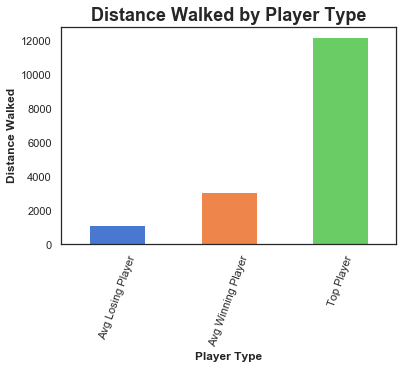

In [303]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Walk_Distance.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Distance Walked', fontweight='bold', fontsize=12)
plt.title('Distance Walked by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

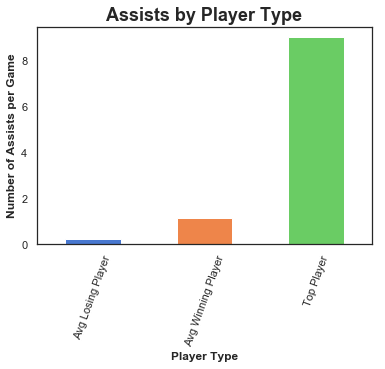

In [286]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Assists.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Number of Assists per Game', fontweight='bold', fontsize=12)
plt.title('Assists by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

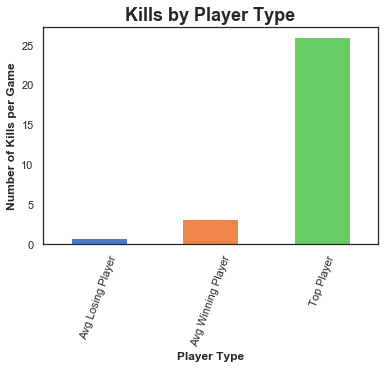

In [287]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Kills.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Number of Kills per Game', fontweight='bold', fontsize=12)
plt.title('Kills by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

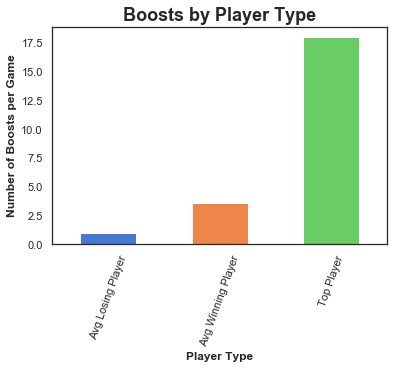

In [288]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Boosts.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Number of Boosts per Game', fontweight='bold', fontsize=12)
plt.title('Boosts by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

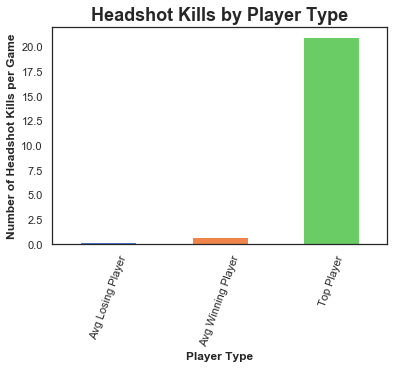

In [289]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Headshot_Kills.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Number of Headshot Kills per Game', fontweight='bold', fontsize=12)
plt.title('Headshot Kills by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

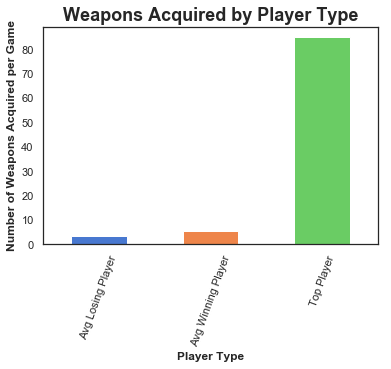

In [290]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Weapons_Acquired.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Number of Weapons Acquired per Game', fontweight='bold', fontsize=12)
plt.title('Weapons Acquired by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

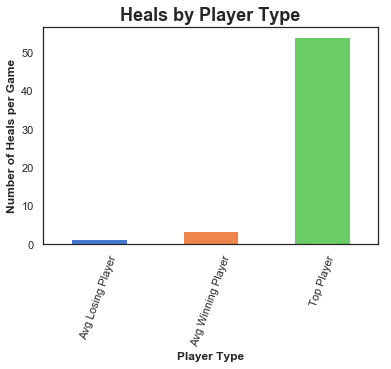

In [291]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Heals.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Number of Heals per Game', fontweight='bold', fontsize=12)
plt.title('Heals by Player Type', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

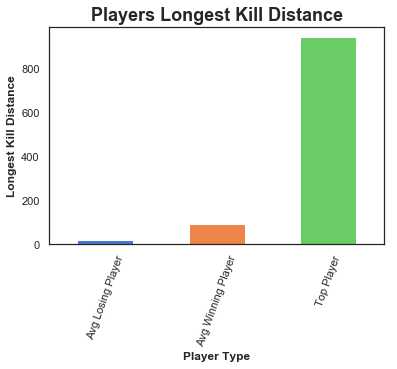

In [292]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Longest_Kill.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Longest Kill Distance', fontweight='bold', fontsize=12)
plt.title('Players Longest Kill Distance', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

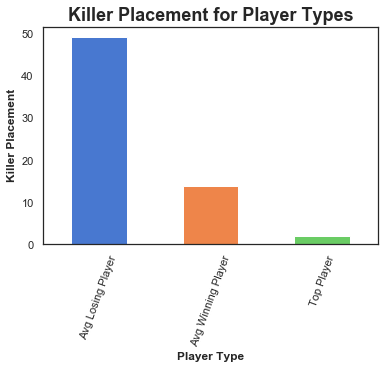

In [293]:
plt.figure(figsize=(6,4))
plot_df_d = df_d.Killer_Placement.plot(kind='bar')
plt.xlabel('Player Type', fontweight='bold', fontsize= 12)
plt.ylabel('Killer Placement', fontweight='bold', fontsize=12)
plt.title('Killer Placement for Player Types', fontweight='bold', fontsize=18)
plot_df_d.set_xticklabels(plot_df_d.get_xticklabels(), rotation=70)
plot_df_d

## Feature Elimination

__Reasons to Remove Features__
<br>
- Non-relevance to our goal - game context
- Multicollinearity
- Non-normality
- Model Feature Importance

### Post-Analysis - Features Considered for Removal
- __Road_Kills__ - the vast majority of players have 0 kills in a vehicle, thus this feature is not required
- __Vehicle_Destroys__ - no players have destroyed a vehicle, thus this feature is not required
- __Friendly_Fire__ - there is very little actual data compared to the number of players in the dataset
- __Rank_Points__: this feature displays a negative relationship with player_Kill_Points and player_Win_Points
- __Kill_Streak__: this feature displays a negative relationship with player_Kills and a positive relationship with other features
- __Longest_Kill__: this feature displays a negative relationship with player_Kills and a positive relationship with other features
- __Killer_Placement__: this feature displays a negative relationship with several features
- __Weapons_Acquired__: this features displays a positive relationship with several features
- __Walk_Distance__: this feature displays a positive relationship with several features
- __Kill_Points__: this features displays a positive relationship with player_Win_Points and player_Rank_Points
- __Swim_Distance__: this feature has a significant imbalance of zero values, most players do not swim as land encompasses most of the map, we should remove for this reason
- __Max_Place__: this feature displays a positive relationship with num_Teams
- __Damage_Dealt__: this feature displays a positive relationship with player_Kills
- __Knockdowns__: this feature displays a positive relationship with player_Kills
- __Headshot_Kills__: this feature displays a positive relationship with player_Kills

### Final Feature Selection
<br>
Remove from all: Team Id, Match Id, Match Type

#### Logistic Regression
Remove Win Points, Kill Points, Kills, Kill Streak, Damage Dealt, and Max Place, Road Kills, Headshot Kills, Vehicle Destroys

In [71]:
df_logistic_regression = df_scaled.copy(deep=True)
df_logistic_regression = df_logistic_regression.drop(columns=['Win_Points', 'Kill_Points', 
                                                              'Kills', 'Kill_Streak', 
                                                              'Headshot_Kills', 'Vehicle_Destroys', 
                                                              'Road_Kills'])

1. Rank Points
- Killer Placement
- Walk Distance
- Knockdowns
- Match Duration
- Assists
- Kills
- Heals
- Boosts
- Number of Teams
- Max Place
- Friendly Fire
- Weapons Acquired
- Revives
- Ride Distance
- Longest Kill
- Swim Distance

#### Random Forest
Remove Win Points, Kill Points, Kills, Kill Streak, Damage Dealt, Max Place, Team Kills, Headshot Kills, Ride Distance, Swim Distance, Vehicle Destroys

In [72]:
df_random_forest = df_scaled.copy(deep=True)
df_random_forest = df_random_forest.drop(columns=['Win_Points', 'Kill_Points', 
                                                              'Kills', 'Kill_Streak', 
                                                              'Damage_Dealt', 'Max_Place', 
                                                              'Friendly_Fire', 'Headshot_Kills', 
                                                              'Ride_Distance', 'Swim_Distance', 
                                                              'Vehicle_Destroys', 'Revives'])

1. Walk Distance
- Killer Placement
- Weapons Acquired
- Longest Kill
- Heals
- Assists
- Knockdowns
- Boosts
- Kills
- Match Duration
- Number of Teams
- Rank Points

#### XGBoost
Remove Rank Points, Kill Points, Kills, Kill Streak, Damage Dealt, Max Place, Vehicle Destroys, Revives, Headshot Kills

In [73]:
df_xgboost = df_scaled.copy(deep=True)
df_xgboost = df_xgboost.drop(columns=['Win_Points', 'Kill_Points', 
                                                              'Kills', 'Kill_Streak', 
                                                              'Damage_Dealt', 'Max_Place', 
                                                              'Friendly_Fire', 'Headshot_Kills', 'Revives',
                                                              'Swim_Distance', 'Vehicle_Destroys',
                                                            'Longest_Kill'])

1. Killer Placement
- Walk Distance
- Number of Teams
- Heals
- Weapons Acquired
- Knockdowns
- Boosts
- Rank Points
- Assists
- Match Duration
- Win Points
- Ride Distance

# Modeling the Data - Classification

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, auc, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [75]:
X = df_scaled[numerical_columns]
y = df_new['Win/Loss']

#### Classification Models - Logistic Regression, Random Forest, XGBoost

In [185]:
# create dataframe with all three model reports for comparison
classification_models = pd.DataFrame()

#### Key Measurements
1. __Accuracy__ - measures the percentage of the time you correctly classify samples: (true positive + true negative) / all samples 
2. __Precision__ - measures the percentage of the predicted members that were correctly classified: true positives / (true positives + false positives) 
3. __Recall__ - measures the percentage of true members that were correctly classified by the algorithm: true positives / (true positives + false negative) 
4. __F1__ - measurement that balances accuracy and precision (or you can think of it as balancing Type I and Type II error) 
5. __AUC__ - describes the probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one 


In [77]:
# set train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("Training set:", X_train.shape, "samples")
print("Testing set:", X_test.shape, "samples")

Training set: (1243109, 24) samples
Testing set: (310778, 24) samples


__Creating Confusion Matrices__

In [78]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
% matplotlib inline

def show_cf(y_true, y_pred, class_names=None, model_name=None):
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(len(class_names))
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

--------------------------------------------------------------------------------------------------------------------

## Logistic Regression

Logistic Regression is a popular algorithm used for classification when the target variable is categorical. The model transforms its output using the logistic sigmoid function to return a probability value that can be used to map to two or more discrete classes. There are three types of logistic regression: binary, multi, and ordinal. We will be using binary classification with this dataset to predict winners and losers among PUBG players. We win conduct a few rounds of logistic regression while we refine our data and experiment with our hyperparameters.

 ### Round 1 - Pre-Feature Elimination and Data Assessment

In [79]:
# initiate LogisticRegression classifier
logreg = LogisticRegression()
# fit training data
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
# setting predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

# assessing accuracy
train_accuracy_logreg = accuracy_score(y_train, y_hat_train)
test_accuracy_logreg = accuracy_score(y_test, y_hat_test)
report_logreg = classification_report(y_test, y_hat_test)

__Results__

In [81]:
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    1212192
1      30917
Name: Win/Loss, dtype: int64
0    0.975129
1    0.024871
Name: Win/Loss, dtype: float64


In [82]:
print('Logistic Regression')
print('--------------------')
print('Training Accuracy:', train_accuracy_logreg*100, '%')
print('Test Accuracy:', test_accuracy_logreg*100, '%')
print('\nClassification Report:')
print(report_logreg)

Logistic Regression
--------------------
Training Accuracy: 97.51292927651556 %
Test Accuracy: 97.48566500846263 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    302702
           1       0.60      0.10      0.17      8076

    accuracy                           0.97    310778
   macro avg       0.79      0.55      0.58    310778
weighted avg       0.97      0.97      0.97    310778



__Confusion Matrix__

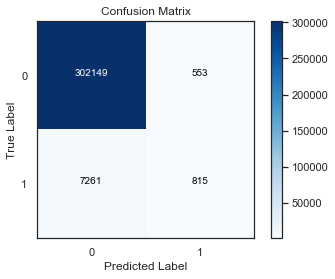

In [83]:
show_cf(y_test, y_hat_test)

### Round 1 -  Logistic Regression Analysis
<br>

These results are suprisingly high in terms of accuracy for a logistic regression model for both the training and testing samples. As I discovered before running this first iteration, there is a significant class imbalance between the winning and losing players captured in this dataset. We will need to address this imbalance using an oversampling technique called SMOTE in order to improve our model.

### Data Imbalance

We see below that there is a substantial difference in our two classes (wins and losses) represented with this dataset. There are nearly 1.5 million more losing players than winning players. This is expected in the context of Battleground gameplay as only a limited number of players on a team can win any given match. However, this creates a problem for our modeling of the data as we require greater balance between the two classes in order to improve and validate the accuracy of our classification models.

In [84]:
print(y.value_counts())

0    1513989
1      39898
Name: Win/Loss, dtype: int64


### Resampling Required to Address the Class Imbalance
<br>
Machine learning algorithms have trouble learning when one class dominates the other. Oversampling is one of the techniques used for handling class imbalance. We can use this process to ensure that the training data has equal amount of player samples between the two classes.

### SMOTE
<br>
The most common oversampling technique is known as SMOTE: Synthetic Minority Over-sampling Technique. SMOTE synthesises new minority instances between existing (real) minority instances. SMOTE takes a sample from the dataset, and considers its k nearest neighbors in the feature space. To create a synthetic data point, it takes the vector between one of those k neighbors, and the current data point and multiplies this vector by a random number x (value between 0 and 1). Then it adds this to the current data point to create the new, synthetic data point. It performs this process iteratively on the minority and majority samples until a balanced set of two class samples results.

In [85]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_resample).value_counts())

/Users/patrickrouth/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


1    1211287
0    1211287
dtype: int64


Now we have a balanced set of winning and losing players to use in our logistic regression model.

In [86]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

### Logistic Regression Round 2 - Post-Resampling 

In [87]:
# initiate LogisticRegression classifier
logreg_2 = LogisticRegression()
# fit training data
logreg_2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
# setting predictions
train_preds_logreg_2 = logreg_2.predict(X_train)
test_preds_logreg_2 = logreg_2.predict(X_test)

# assessing accuracy
train_accuracy_logreg_2 = accuracy_score(y_train, train_preds_logreg_2)
test_accuracy_logreg_2 = accuracy_score(y_test, test_preds_logreg_2)
report_logreg_2 = classification_report(y_test, test_preds_logreg_2)

### Results

In [89]:
residuals = np.abs(y_train - train_preds_logreg_2)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    1685197
1     252862
dtype: int64
0    0.869528
1    0.130472
dtype: float64


In [90]:
print('Logistic Regression Round 2')
print('--------------------')
print('Training Accuracy:', train_accuracy_logreg_2*100, '%')
print('Test Accuracy:', test_accuracy_logreg_2*100, '%')
print('\nClassification Report:')
print(report_logreg_2)

Logistic Regression Round 2
--------------------
Training Accuracy: 86.95282238569621 %
Test Accuracy: 86.95953685644407 %

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87    242211
           1       0.85      0.90      0.87    242304

    accuracy                           0.87    484515
   macro avg       0.87      0.87      0.87    484515
weighted avg       0.87      0.87      0.87    484515



__Confusion Matrix__

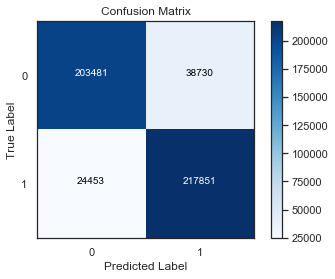

In [91]:
show_cf(y_test, test_preds_logreg_2)

__Feature Importance Assessment__

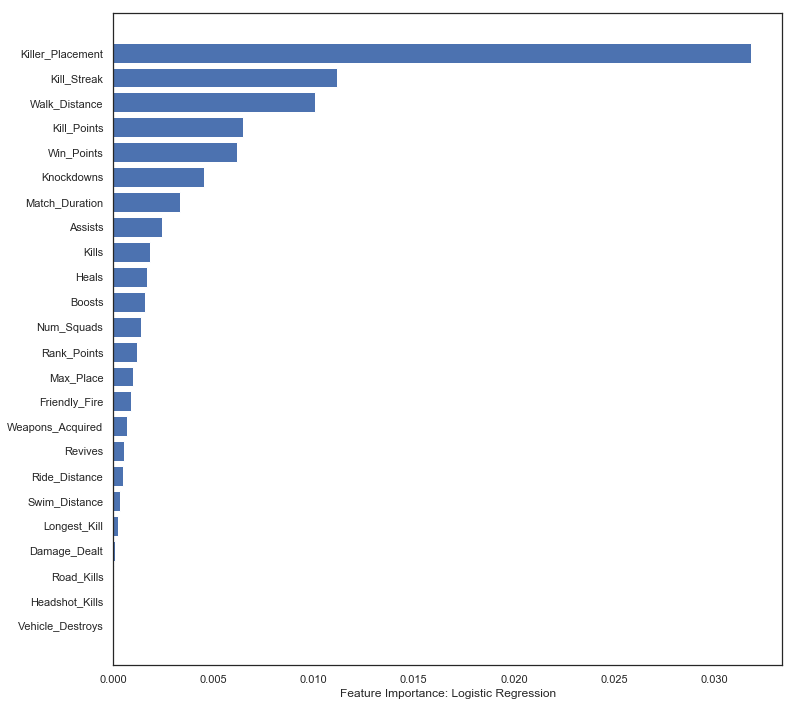

In [92]:
feat_importance_logreg_2 = abs(logreg_2.coef_[0])/100
sorted_index = np.argsort(feat_importance_logreg_2)
pos = np.arange(sorted_index.shape[0])

featfig = plt.figure(figsize=(12,12))
featax = featfig.add_subplot(1,1,1)
featax.barh(pos, feat_importance_logreg_2[sorted_index], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array((X.columns)[sorted_index]))
featax.set_xlabel('Feature Importance: Logistic Regression');

#### ROC and AUC

AUC: 0.8696


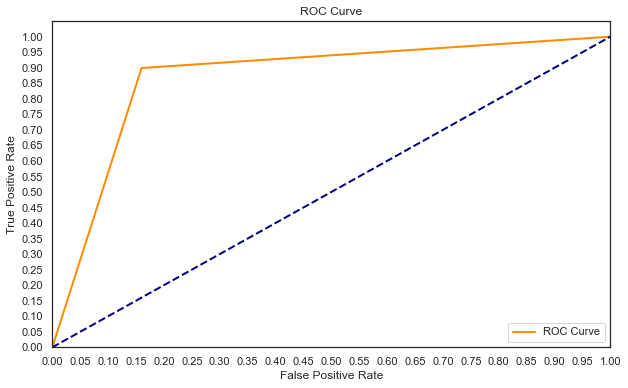

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_logreg_2)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Analysis
<br>
We see a decrease in accuracy from our first round of Logistic Regression, however the resampling we completed was required for us to move forward with the modeling. The dip in accuracy is expected and the 87% for both the training and testing samples is satisfactory. We also see an AUC value of 0.8743, also satisfactory. However, we do have features that demonstrate colinearity that may be impacting our results. We will need to remove features to eliminate the impact of related features affecting our classification. Let's skip ahead to the next two models, Random Forest and XGBoost, to run through a single round and see what accuracy levels result and perform feature importance tests to help us choose which features to keep for our final rounds of models.

### Logistic Regression Round 3 - Post-Feature Elimination 

In [94]:
X_log_reg = df_logistic_regression
y_log_reg = df_new['Win/Loss']

In [95]:
# set train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_log_reg, y_log_reg, test_size=0.2, random_state=0)
print("Training set:", X_train.shape, "samples")
print("Testing set:", X_test.shape, "samples")

Training set: (1243109, 17) samples
Testing set: (310778, 17) samples


In [96]:
X_resample, y_resample = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_resample).value_counts())

1    1211287
0    1211287
dtype: int64


Now we have a balanced set of winning and losing players to use in our logistic regression model.

In [97]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

In [98]:
# initiate LogisticRegression classifier
logreg_3 = LogisticRegression()
# fit training data
logreg_3.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [99]:
# setting predictions
train_preds_logreg_3 = logreg_3.predict(X_train)
test_preds_logreg_3 = logreg_3.predict(X_test)

# assessing accuracy
train_accuracy_logreg_3 = accuracy_score(y_train, train_preds_logreg_3)
test_accuracy_logreg_3 = accuracy_score(y_test, test_preds_logreg_3)
report_logreg_3 = classification_report(y_test, test_preds_logreg_3)

### Results

In [100]:
residuals = np.abs(y_train - train_preds_logreg_3)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    1674100
1     263959
dtype: int64
0    0.863802
1    0.136198
dtype: float64


In [101]:
print('Logistic Regression Round 3')
print('--------------------')
print('Training Accuracy:', train_accuracy_logreg_3*100, '%')
print('Test Accuracy:', test_accuracy_logreg_3*100, '%')
print('\nClassification Report:')
print(report_logreg)

Logistic Regression Round 3
--------------------
Training Accuracy: 86.38023919808427 %
Test Accuracy: 86.40186578330909 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    302702
           1       0.60      0.10      0.17      8076

    accuracy                           0.97    310778
   macro avg       0.79      0.55      0.58    310778
weighted avg       0.97      0.97      0.97    310778



__Confusion Matrix__

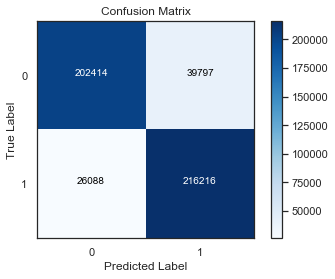

In [102]:
show_cf(y_test, test_preds_logreg_3)

AUC: 0.864


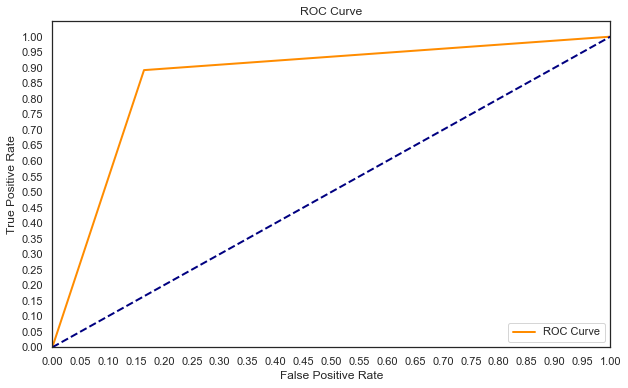

In [103]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_logreg_3)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### Add Logistic Regression Report to Models Dataframe

In [186]:
log_reg_score_3 = ['Logistic Regression', train_accuracy_logreg_3, 
                 test_accuracy_logreg_3]
classification_models = classification_models.append([log_reg_score_3])

--------------------------------------------------------------------------------------------------------------------

## Random Forest

Random Forest is a bagging-based algorithm where only a subset of features are selected at random to build a forest or collection of decision trees. Bagging (bootstrap aggregation) is an ensemble meta-algorithm combining predictions from multuple decision trees through a majority voting mechanism.

### Building the Model - Round 1

In [115]:
X_random_forest = df_scaled[numerical_columns]
y_random_forest = df_new['Win/Loss']

In [116]:
# set train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y_random_forest, test_size=0.2, random_state=0)
print("Training set:", X_train.shape, "samples")
print("Testing set:", X_test.shape, "samples")

Training set: (1243109, 24) samples
Testing set: (310778, 24) samples


In [117]:
# instantiate RF classifier object
forest = RandomForestClassifier()

# fitting the model
forest.fit(X_train, y_train)

# setting predictions
train_preds_forest = forest.predict(X_train)
test_preds_forest = forest.predict(X_test)

# assessing accuracy
train_accuracy_forest = accuracy_score(y_train, train_preds_forest)
test_accuracy_forest = accuracy_score(y_test, test_preds_forest)
report_forest = classification_report(y_test, test_preds_forest)

In [111]:
print('Random Forest')
print('--------------------')
print('Training Accuracy:', train_accuracy_forest*100, '%')
print('Test Accuracy:', test_accuracy_forest*100, '%')
print('\nClassification Report:')
print(report_forest)

Random Forest
--------------------
Training Accuracy: 99.6649529526373 %
Test Accuracy: 97.4293547162283 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    302702
           1       0.52      0.13      0.20      8076

    accuracy                           0.97    310778
   macro avg       0.75      0.56      0.60    310778
weighted avg       0.97      0.97      0.97    310778



#### Feature Importance Assessment

Text(0.5, 0, 'Relative Feature Importance with Random Forest')

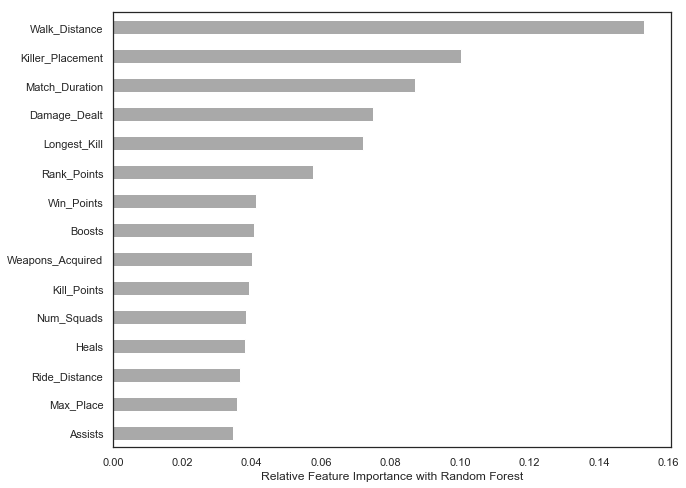

In [120]:
feat_importance_forest = pd.Series(forest.feature_importances_, index=X.columns)
feat_importance_forest.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,8))

plt.xlabel('Relative Feature Importance with Random Forest')

#### ROC and AUC

AUC: 0.5545


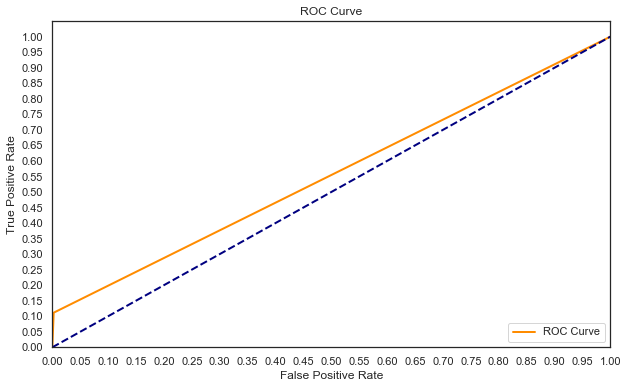

In [121]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_forest)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Analysis
<br>
Training Accuracy: 99.6649529526373 %
<br>
Test Accuracy: 97.4293547162283 %
<br>

We again see very very high accuracy scores from this first round of Random Forest classification with a balanced dataset. I suspect this is partially due to the multicolinearity that exists between the features involved in this model. The AUC is quite low and provides barely better odds than 50-50 guessing each of the classes. It is often the result of overfitting the model to the training data, an outcome we would like to avoid. The feature important test also provided slightly different results which we will factor into our feature elimination. Now one more model to go through an initial round on before we circle back for tuning.

### Round 2 - Post-Feature Elimination

In [122]:
X_random_forest = df_random_forest
y_random_forest = df_new['Win/Loss']

In [123]:
# set train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_random_forest, y_random_forest, test_size=0.2, random_state=0)
print("Training set:", X_train.shape, "samples")
print("Testing set:", X_test.shape, "samples")

Training set: (1243109, 12) samples
Testing set: (310778, 12) samples


In [124]:
X_resample, y_resample = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_resample).value_counts())

1    1211287
0    1211287
dtype: int64


Now we have a balanced set of winning and losing players to use in our logistic regression model.

In [125]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

In [126]:
# instantiate RF classifier object
forest = RandomForestClassifier()

# fitting the model
forest.fit(X_train, y_train)

# setting predictions
train_preds_forest_2 = forest.predict(X_train)
test_preds_forest_2 = forest.predict(X_test)

# assessing accuracy
train_accuracy_forest_2 = accuracy_score(y_train, train_preds_forest_2)
test_accuracy_forest_2 = accuracy_score(y_test, test_preds_forest_2)
report_forest_2 = classification_report(y_test, test_preds_forest_2)

In [127]:
print('Random Forest - Round 2')
print('--------------------')
print('Training Accuracy:', train_accuracy_forest_2*100, '%')
print('Test Accuracy:', test_accuracy_forest_2*100, '%')
print('\nClassification Report:')
print(report_forest_2)

Random Forest - Round 2
--------------------
Training Accuracy: 99.94912435586326 %
Test Accuracy: 98.17281198724498 %

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98    242211
           1       0.97      0.99      0.98    242304

    accuracy                           0.98    484515
   macro avg       0.98      0.98      0.98    484515
weighted avg       0.98      0.98      0.98    484515



#### ROC and AUC

AUC: 0.9817


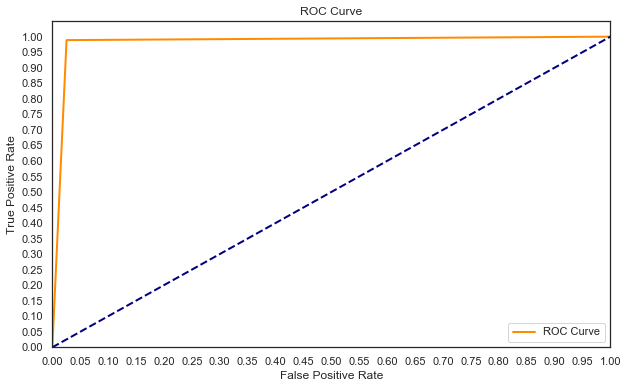

In [128]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_forest_2)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Analysis
<br>
Training Accuracy: 99.94912435586326 %
<br>
Test Accuracy: 98.17281198724498 %
<br>



#### Add Random Forest Report to Models Dataframe

In [187]:
forest_score = ['Random Forest', train_accuracy_forest_2, 
                 test_accuracy_forest_2]
classification_models = classification_models.append([forest_score])

--------------------------------------------------------------------------------------------------------------------

## XGBoost

XGBoost (eXtreme Gradient Boosting) is an optimized Gradient Boosting algorithm through parallel processing, tree pruning, handling missing values, and regularization to avoid overfitting and bias. XGBoost refers to the engineering goal to push the limit of computations resources for boosted tree algorithms.
<br>
<br>
Gradient boosting employs the gradient descent algorithm to minimize errors in sequential models. Before gradient boosting, there was just boosting. Boosting consists of models built sequentially to minimize the error from previous models while increasing influence of high-performing models. Boosting, Gradient Boosting, and XGBoost are all successors of Decision Trees and Random Forests.

XGBoost Features
<br>
- Utilizes Parallelization of tree construction using all of your CPU cores during training.
- Distributed Computing for training very large models using a cluster of machines.
- Out-of-Core Computing for very large datasets that don’t fit into memory.
- Cache Optimization of data structures and algorithm to make best use of hardware.

In [129]:
X_xgb = df_scaled[numerical_columns]
y_xgb = df_new['Win/Loss']

In [130]:
# set train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=0)
print("Training set:", X_train.shape, "samples")
print("Testing set:", X_test.shape, "samples")

Training set: (1243109, 24) samples
Testing set: (310778, 24) samples


In [131]:
X_resample, y_resample = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_resample).value_counts())

1    1211287
0    1211287
dtype: int64


Now we have a balanced set of winning and losing players to use in our logistic regression model.

In [132]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

#### Building the Model

In [133]:
booster = xgb.XGBClassifier()

booster.fit(X_train, y_train)

train_preds_booster = booster.predict(X_train)
test_preds_booster = booster.predict(X_test)

train_accuracy_booster = accuracy_score(y_train, train_preds_booster)
test_accuracy_booster = accuracy_score(y_test, test_preds_booster)
report_booster = classification_report(y_test, test_preds_booster)

In [134]:
print('XGBoost')
print('--------------------')
print('Training Accuracy:', train_accuracy_booster*100, '%')
print('Test Accuracy:', test_accuracy_booster*100, '%')
print('\nClassification Report:')
print(report_booster)

XGBoost
--------------------
Training Accuracy: 95.3377580352301 %
Test Accuracy: 95.31325139572562 %

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95    242211
           1       0.93      0.98      0.95    242304

    accuracy                           0.95    484515
   macro avg       0.95      0.95      0.95    484515
weighted avg       0.95      0.95      0.95    484515



#### Feature Importance Testing

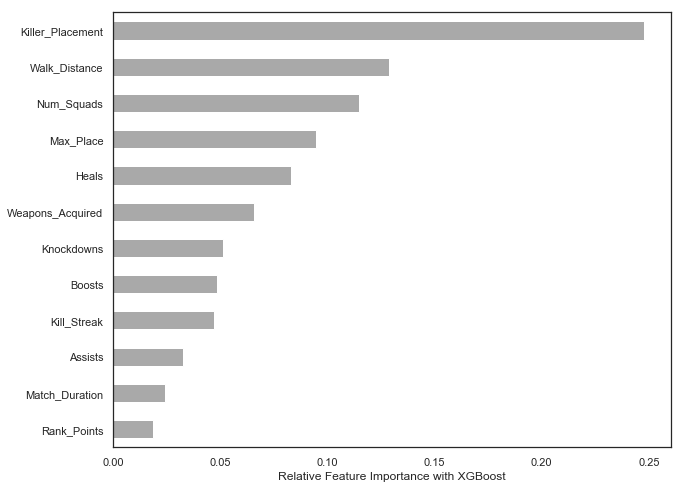

In [135]:
feat_importance_booster = pd.Series(booster.feature_importances_, index=X_xgb.columns)
feat_importance_booster.nlargest(12).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,8))

plt.xlabel('Relative Feature Importance with XGBoost');

#### ROC and AUC

AUC: 0.9531


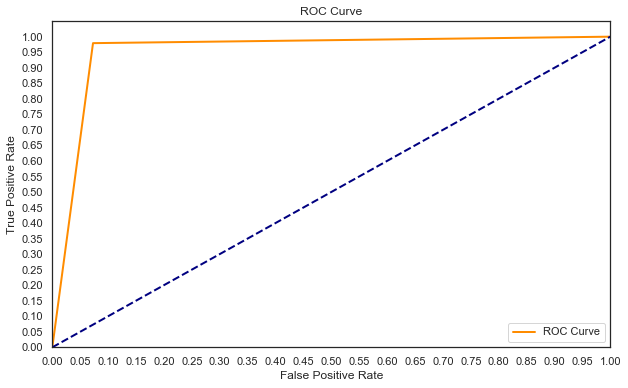

In [136]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_booster)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Analysis
<br>
Training Accuracy: 95.3377580352301 %
<br>
Test Accuracy: 95.31325139572562 %
<br>

After one round of XGBoost, we see ~95% accuracy for both the training and testing data sets as well as the AUC score. Based on the feature importance results and our evidence gathered on the specific features, we can eliminate variables and run another round to improve our model.

### XGBoost Round 2

In [137]:
X_xgb = df_xgboost
y_xgb = df_new['Win/Loss']

In [138]:
# set train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=0)
print("Training set:", X_train.shape, "samples")
print("Testing set:", X_test.shape, "samples")

Training set: (1243109, 12) samples
Testing set: (310778, 12) samples


In [139]:
X_resample, y_resample = SMOTE().fit_sample(X_train, y_train)

print(pd.Series(y_resample).value_counts())

1    1211287
0    1211287
dtype: int64


Now we have a balanced set of winning and losing players to use in our logistic regression model.

In [140]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.2, random_state=0)

In [141]:
booster = xgb.XGBClassifier()

booster.fit(X_train, y_train)

train_preds_booster_2 = booster.predict(X_train)
test_preds_booster_2 = booster.predict(X_test)

train_accuracy_booster_2 = accuracy_score(y_train, train_preds_booster_2)
test_accuracy_booster_2 = accuracy_score(y_test, test_preds_booster_2)
report_booster_2 = classification_report(y_test, test_preds_booster_2)

In [142]:
print('XGBoost Round 2')
print('--------------------')
print('Training Accuracy:', train_accuracy_booster_2*100, '%')
print('Test Accuracy:', test_accuracy_booster_2*100, '%')
print('\nClassification Report:')
print(report_booster_2)

XGBoost Round 2
--------------------
Training Accuracy: 92.68340127932122 %
Test Accuracy: 92.6697831852471 %

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92    242211
           1       0.91      0.95      0.93    242304

    accuracy                           0.93    484515
   macro avg       0.93      0.93      0.93    484515
weighted avg       0.93      0.93      0.93    484515



#### Feature Importance Testing

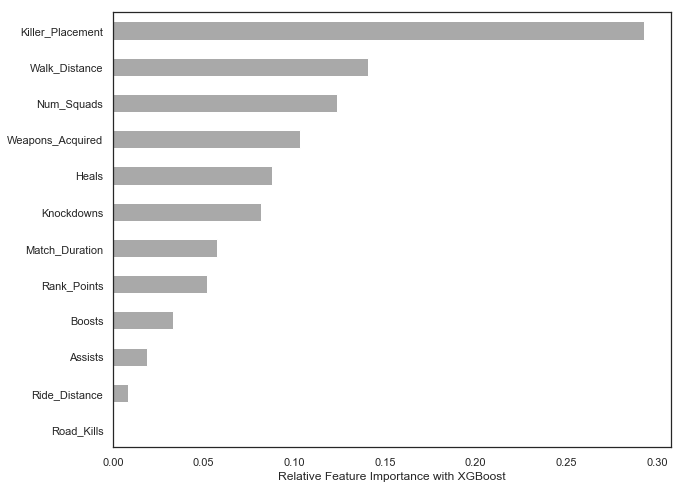

In [143]:
feat_importance_booster = pd.Series(booster.feature_importances_, index=X_xgb.columns)
feat_importance_booster.nlargest(12).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,8))

plt.xlabel('Relative Feature Importance with XGBoost');

#### ROC and AUC

AUC: 0.9267


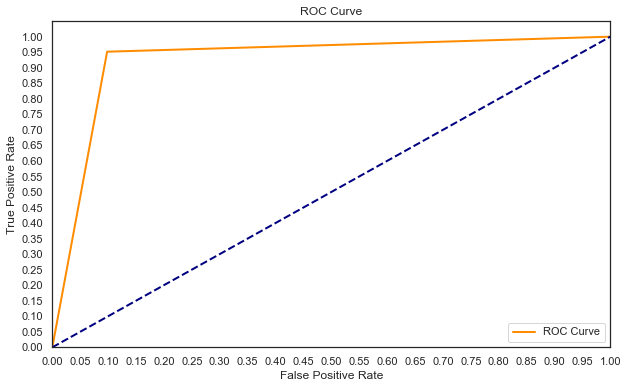

In [144]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_booster_2)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Analysis
<br>
Training Accuracy: 92.68340127932122 %
<br>
Test Accuracy: 92.6697831852471 %
<br>
<br>
We actually see a decrease in accuracy between our first and second rounds of XGBoost. The delta between the two trials was the chosen dataset as we decided to remove certain features that demonstrated multi-collinearity with one another as well as features that did not display on the feature importance test that we ran with our first round of XGBoost. So, our goal was to improve the validity of our model by reducing the noise introduced by conflicting data. Let's engage in a third round of XGBoost, this time with parameter tuning, to see if we can improve our training and testing accuracy.

__XGBoost - Parameter Tuning__

In [164]:
booster_3 = xgb.XGBClassifier(n_estimators=100, max_depth=5, 
                                  min_child_weight=1, scale_pos_weight=1, 
                                  gamma=0.0, random_state=4)

booster_3.fit(X_train, y_train)

train_preds_booster_3 = booster_3.predict(X_train)
test_preds_booster_3 = booster_3.predict(X_test)

train_accuracy_booster_3 = accuracy_score(y_train, train_preds_booster_3)
test_accuracy_booster_3 = accuracy_score(y_test, test_preds_booster_3)
report_booster_3 = classification_report(y_test, test_preds_booster_3)

In [165]:
print('XGBoost - Tuned Part 2')
print('--------------------')
print('Training Accuracy:', train_accuracy_booster_3*100, '%')
print('Test Accuracy:', test_accuracy_booster_3*100, '%')
print('\nClassification Report:')
print(report_booster_3)

XGBoost - Tuned Part 2
--------------------
Training Accuracy: 95.47402839645233 %
Test Accuracy: 95.47877774681899 %

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95    242211
           1       0.94      0.97      0.96    242304

    accuracy                           0.95    484515
   macro avg       0.96      0.95      0.95    484515
weighted avg       0.96      0.95      0.95    484515



AUC: 0.9548


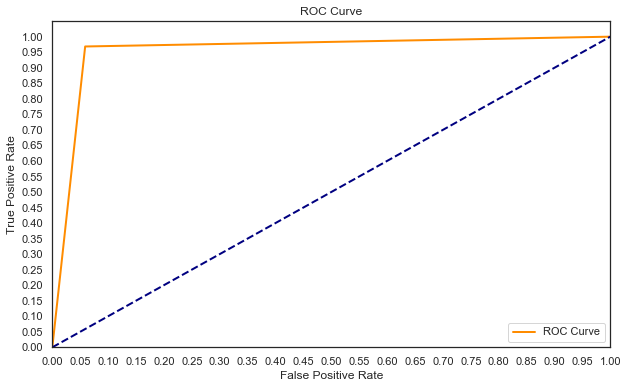

In [166]:
fpr, tpr, thresholds = roc_curve(y_test, test_preds_booster_3)
roc_auc = auc(fpr, tpr)

print('AUC:', round(roc_auc, 4))

plt.figure(figsize=(10,6))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC Curve')
plt.plot([0,1], [0,1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

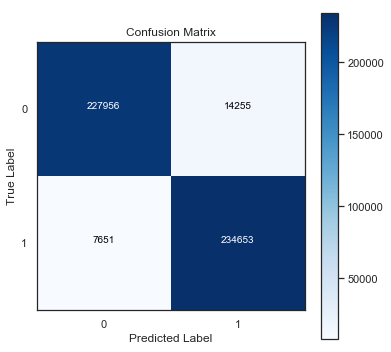

In [167]:
plt.figure(figsize=(6,6))
show_cf(y_test, test_preds_booster_3)

#### Add XGBoost Report to Models Dataframe

In [188]:
xgboost_score_3 = ['XGBoost', train_accuracy_booster_3, 
                 test_accuracy_booster_3]
classification_models = classification_models.append([xgboost_score_3])

### Analysis
Training Accuracy: 95.47402839645233 %
<br>
Test Accuracy: 95.47877774681899 %
<br>
<br>
In our final round of XGBoost, we are reminded that this particular algorithm is very fast. We also saw a notable improvement in our model's accuracy on our second round with parameter tuning engaged. There was an increase in both the Training and Testing Datasets accuracy from 92% to 95%. I feel confident in this model's output classifying our winning and losing players with high accuracy and impressive efficiency.

# Interpretting the Data

In [189]:
classification_models.columns = ['Classification Model', 'Training Accuracy', 'Testing Accuracy']

In [190]:
classification_models = classification_models.set_index('Classification Model')
classification_models

,Training Accuracy,Testing Accuracy
Classification Model,,
Logistic Regression,0.863802,0.864019
Random Forest,0.999491,0.981728
XGBoost,0.954740,0.954788


### Conclusion
In this project, we asked the question of what features would be best to classify winning and losing players in Player Unknown's Battleground. We started with a dataset containing player statistics gathered from a series of first player perspective squad matches. The dataset held 1.7 million player records and 29 features (numerical and categorical) to describe the actions that occurred over the duration of a single match and some historical stats representative of past performance.
<br>
<br>
Moving through the steps of the OSEMN Data Science Framework, we gathered the data, prepared it for modelling, then executed three separate machine learning algorithms on training and testing sample datasets to determine the accuracy with which they could succesfully classify winning and losing players. Each test delivered separate results and we saw more success with one over the competing two methods.
<br>
<br>
Along the journey, we were careful in our attempts to use the data to generate insights in order to answer our primary question. Careful because we did not want to misrepresent the data, create overfitting of our training dataset, or manipulate the results in our favor. We put checks in place to remove features that demonstrate multi-collinearity, insignificant data features like Match Id and Team Id (trivial in the context of our question), and to balance the classes within our data with resampling.
<br>
<br>
In the end we found that Logistic Regression had the lowest Training and Testing Accuracy among the classification models that were conducted. XGBoost was next with 95.5% accuracy for both Training and Testing data and finally Random Forest delivered the highest accuracy with 99.9% Training and 98.1% Testing.
<br>
<br>
With the above results in mind, I would still feel more confident with the XGBoost model as the chosen classification technique. XGBoost offers more controls that reduce the risk of overfitting and consistently delivers a higher accuracy rate than Random Forest or Logistic Regression.

## Summary

#### Three Classification Models 

 - Logistic Regression - makes the values more ‘normalized’ with scaling to achieve more consistent coefficients

 - Random Forest - uses averaging to improve the predictive accuracy and control over-fitting

 - XGBoost - laser focused on computational speed and model performance

Each of the three models analyzed different datasets giving weight and importance to different features in relation to our target.

#### Logistic Regression

1. Rank Points
- Killer Placement
- Walk Distance
- Knockdowns
- Match Duration
- Assists
- Kills
- Heals
- Boosts
- Number of Teams
- Max Place
- Friendly Fire
- Weapons Acquired
- Revives
- Ride Distance
- Longest Kill
- Swim Distance

#### Random Forest

1. Walk Distance
- Killer Placement
- Weapons Acquired
- Longest Kill
- Heals
- Assists
- Knockdowns
- Boosts
- Kills
- Match Duration
- Number of Teams
- Rank Points

#### XGBoost

1. Killer Placement
- Walk Distance
- Number of Teams
- Heals
- Weapons Acquired
- Knockdowns
- Boosts
- Rank Points
- Assists
- Match Duration
- Win Points
- Ride Distance

From the above, we can start to update our player strategy in PUBG games to focus efforts on the controllables. Players can alter their gameplay to maximize certain features such as Walk Distance, Weapons Acquired, Heals, and Boosts. These features have high significance among winning players and especially among the top winning players. With this knowledge, we are better equipped to survive matches, kill opponents, earn points, and move up in the ranks among the millions of players worldwide.